# Introducción

En este proyecto, analizamos un conjunto de datos sobre videojuegos, centrado en sus ventas, puntuaciones de críticos y usuarios, y otras características relevantes. El análisis tiene como objetivo principal entender las tendencias de ventas y popularidad de los videojuegos a lo largo del tiempo, así como identificar los factores que pueden influir en su éxito comercial.

# Objetivos del Análisis

- Explorar la distribución y tendencias de las ventas de videojuegos por año, por plataforma y region.



- Analizar las puntuaciones de críticos y usuarios para diferentes géneros de videojuegos.



- Identificar correlaciones significativas entre las ventas y las puntuaciones de críticos y usuarios.



- Realizar pruebas de hipótesis para determinar si existen diferencias significativas en las ventas entre diferentes plataformas y géneros.

# Descripción del Conjunto de Datos

 El conjunto de datos utilizado en este análisis contiene información detallada sobre videojuegos, incluyendo:

- Nombre del videojuego



- Plataforma: La consola o sistema en el que se lanzó el videojuego (e.g., PS2, Wii, DS).



- Año de lanzamiento



- Género



- Ventas por región: Ventas en Norteamérica (NA), Europa (EU), Japón (JP) y otras regiones (Other).



- Puntuaciones de críticos y usuarios: Valoraciones numéricas dadas por críticos profesionales y usuarios.



- Clasificación: Clasificación de contenido del videojuego (e.g., E para todos, M para adultos).



# Procesamiento y Limpieza de Datos

Antes de realizar el análisis, se llevaron a cabo varias etapas de preprocesamiento y limpieza de datos:

## . Conversión de Columnas: Los nombres de las columnas se convirtieron a minúsculas para una manipulación más sencilla.



## . Manejo de Valores Nulos:



- Los valores "tbd" (to be determined) en la columna user_score se reemplazaron por NaN y la columna se convirtió al tipo de dato float.



- Se eliminaron las filas con valores nulos en name, genre y year_of_release.



- Los valores nulos en critic_score y user_score se completaron con la mediana de su respectivo género.



- Los valores nulos en la columna rating se reemplazaron con "unknown".



## . Cálculo de Ventas Totales: Se calculó una nueva columna total_sales como la suma de las ventas en todas las regiones.



# Análisis Exploratorio de Datos

Se realizaron varias visualizaciones y análisis exploratorios para entender las tendencias en los datos:

- Distribución de Juegos por Año: Se analizó la cantidad de juegos lanzados por año para identificar los períodos de mayor actividad en la industria.



- Ventas por Plataforma: Se compararon las ventas totales entre diferentes plataformas para identificar las más exitosas.



- Ventas por Género: Se exploraron las ventas por género para entender qué tipos de juegos son más populares.



# Próximos Pasos

siguiente paso en este análisis será formular y probar hipótesis específicas sobre las ventas de videojuegos y sus correlaciones con las puntuaciones de críticos y usuarios. Esto incluirá:

- Pruebas de Hipótesis: Determinar si existen diferencias significativas en las ventas entre diferentes plataformas y géneros.



- Análisis de Correlación: Evaluar las relaciones entre las puntuaciones y las ventas para identificar factores clave de éxito.



Este análisis proporcionará una comprensión más profunda de los factores que impulsan el éxito de los videojuegos y ayudará a guiar futuras decisiones en la industria.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats as st

In [2]:
df= pd.read_csv('/datasets/games.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
df.columns= df.columns.str.lower()
df.sample(5)


name platform  year_of_release  \
12555          Star Soldier: Vanishing Earth      N64           1998.0   
8202           The Suffering: Ties That Bind      PS2           2005.0   
13399                       Super Bubble Pop       GC           2003.0   
3932                           My Word Coach      Wii           2007.0   
6675   NBA Courtside 2 featuring Kobe Bryant      N64           1999.0   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
12555  Shooter      0.05      0.01       0.0         0.00           NaN   
8202    Action      0.09      0.07       0.0         0.02          75.0   
13399   Puzzle      0.04      0.01       0.0         0.00          54.0   
3932      Misc      0.46      0.01       0.0         0.04          68.0   
6675    Sports      0.20      0.05       0.0         0.00           NaN   

      user_score rating  
12555        NaN    NaN  
8202           8      M  
13399        tbd      E  
3932         tbd      E  
6675         NaN    NaN

In [4]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) #Reemplazamos los valores 'tbd' que se encuentran en nuestra columna por NaN
df['user_score'] = df['user_score'].astype(float) #Ahora cambiamos el formato de object a float para poder realizar estudios a futuro

### Observaciones:

Pudimos darnos cuenta al momento de convertir la columna a float que el error nos indicaba que existian datos str 'tbd' en nuestra columna por que no nos permitia realizar el cambio de formato a str, en este caso reemplazamos esos datos que supones que es la abreviatura en ingles de (to be determined), en español (por confirmar) a NaN con el metodo numpy (np.nan).

El resto de las columnas tienen un formato correcto para poder trabajar en ellas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [6]:
df= df.dropna(subset=['name', 'genre', 'year_of_release'])

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información recaba mediante una investigación. Es muy común que cuando trabajamos con datos en la vida real, mucho de estos vengan con valores nulos que en ocasiones tendremos que completar con proxys
</div>

In [7]:
genre_median= df.groupby('genre')[['critic_score', 'user_score']].median()
genre_median

critic_score  user_score
genre                                 
Action                68.0         7.4
Adventure             66.0         7.6
Fighting              72.0         7.6
Misc                  69.0         7.1
Platform              69.5         7.7
Puzzle                70.0         7.5
Racing                69.0         7.4
Role-Playing          74.0         7.8
Shooter               73.0         7.4
Simulation            70.0         7.5
Sports                75.0         7.4
Strategy              73.0         7.8

In [8]:
genres= genre_median.index
genres

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='genre')

In [9]:
median_critic= genre_median['critic_score'].tolist()
median_critic

[68.0, 66.0, 72.0, 69.0, 69.5, 70.0, 69.0, 74.0, 73.0, 70.0, 75.0, 73.0]

In [10]:
dict_median_critic= dict(zip(genres, median_critic))
dict_median_critic

{'Action': 68.0,
 'Adventure': 66.0,
 'Fighting': 72.0,
 'Misc': 69.0,
 'Platform': 69.5,
 'Puzzle': 70.0,
 'Racing': 69.0,
 'Role-Playing': 74.0,
 'Shooter': 73.0,
 'Simulation': 70.0,
 'Sports': 75.0,
 'Strategy': 73.0}

In [11]:
for genre, critic in dict_median_critic.items():
    filtered_genre= df['genre'] == genre
    df.loc[filtered_genre, 'critic_score'] = df.loc[filtered_genre, 'critic_score'].fillna(critic)

In [12]:
median_users= genre_median['user_score'].tolist()
median_users

[7.4, 7.6, 7.6, 7.1, 7.7, 7.5, 7.4, 7.8, 7.4, 7.5, 7.4, 7.8]

In [13]:
dict_median_users= dict(zip(genres, median_users))
dict_median_users

{'Action': 7.4,
 'Adventure': 7.6,
 'Fighting': 7.6,
 'Misc': 7.1,
 'Platform': 7.7,
 'Puzzle': 7.5,
 'Racing': 7.4,
 'Role-Playing': 7.8,
 'Shooter': 7.4,
 'Simulation': 7.5,
 'Sports': 7.4,
 'Strategy': 7.8}

In [14]:
for genre, users in dict_median_users.items():
    filtered_users_genre= df['genre'] == genre
    df.loc[filtered_users_genre, 'user_score'] = df.loc[filtered_users_genre, 'user_score'].fillna(users)

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo. Cuando trabajamos con distribuciones sesgasdas se recomienda usar la mediana para completar los valores nulos
</div>

In [15]:
df['rating'] = df['rating'].fillna('unknown')

In [16]:
df['year_of_release']= df['year_of_release'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [18]:
df['total_sales']= df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
columns= ['name',
          'platform',
          'year_of_release',
          'genre',
          'na_sales',
          'eu_sales',
          'jp_sales',
          'other_sales',
          'total_sales',
          'critic_score',
          'user_score',
          'rating',]

df= df.reindex(columns=columns)
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score  \
0     28.96      3.77         8.45        82.54          76.0         8.0   
1      3.58      6.81         0.77        40.24          69.5         7.7   
2     12.76      3.79         3.29        35.52          82.0         8.3   
3     10.93      3.28         2.95        32.77          80.0         8.0   
4      8.89     10.22         1.00        31.38          74.0         7.8   

    rating  
0        E  
1  unknown  
2        E  
3        E  
4  unknown

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

# Juegos lanzados en diferentes años

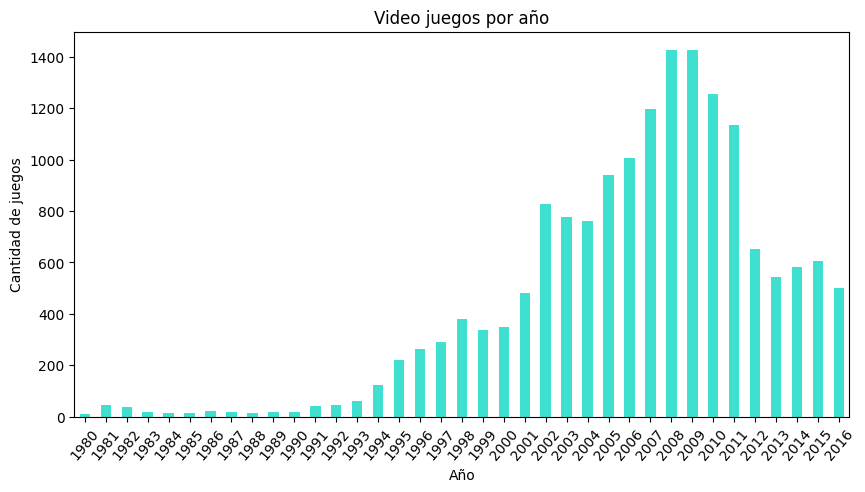

In [19]:
filtered_game_years= df['year_of_release'].value_counts().sort_index()
filtered_game_years.plot(kind= 'bar',
                        title= 'Video juegos por año',
                        xlabel= 'Año',
                        ylabel= 'Cantidad de juegos',
                        rot= 50,
                         figsize= [10,5],
                        color='Turquoise')

plt.show()

### Observaciones: 

Podemos visualizar que los mejores 5 años en ventas de videojuegos son desde el 2007 al 2011.

In [20]:
filtered_sales_platform= df.groupby('platform')['total_sales'].sum()
filtered_sales_platform.sort_values(inplace=True)
filtered_sales_platform

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

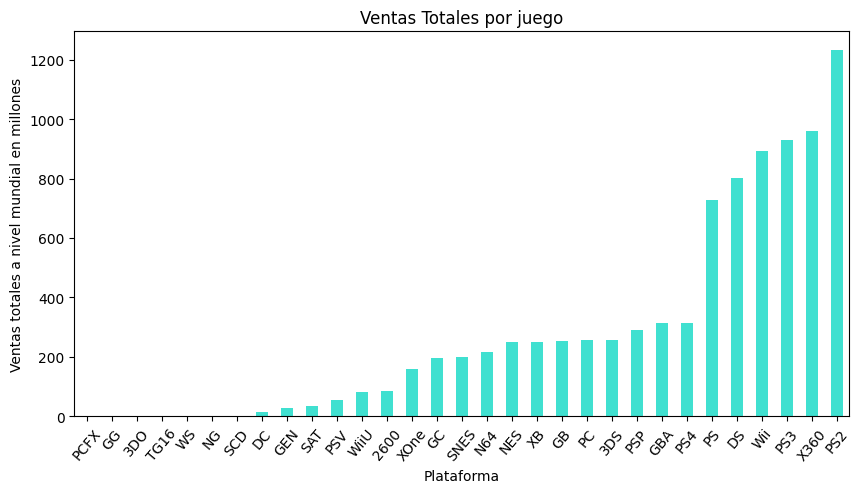

In [21]:
filtered_sales_platform.plot(kind= 'bar',
                            title= 'Ventas Totales por juego',
                            xlabel= 'Plataforma',
                            ylabel= 'Ventas totales a nivel mundial en millones',
                            figsize= [10,5],
                            rot= 50,
                            color= 'Turquoise')

plt.show()

### Observaciones:

Como podemos visualizar en las ventas totales, el PS2 lidera como la consola con mas ventas hasta el momento teniendo en cuenta que esta consola tiene en el mercado desde el año 2000, mientras que las otras plataformas fueron lanzadas desde el 2005 en adelante.   

In [22]:
platform_max_sales= ['DS', 'Wii', 'PS3', 'X360', 'PS2']
df_filtered= df[df['platform'].isin(platform_max_sales)]
df_filtered.head()

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score  \
0     28.96      3.77         8.45        82.54          76.0         8.0   
2     12.76      3.79         3.29        35.52          82.0         8.3   
3     10.93      3.28         2.95        32.77          80.0         8.0   
6      9.14      6.50         2.88        29.80          89.0         8.5   
7      9.18      2.93         2.84        28.91          58.0         6.6   

  rating  
0      E  
2      E  
3      E  
6      E  
7      E

In [23]:
pivot_df_filtered= df_filtered.pivot_table(index='year_of_release',
                                    columns='platform',
                                    values='total_sales',
                                    aggfunc='sum')

Text(153.75, 0.5, 'Año de lanzamiento')

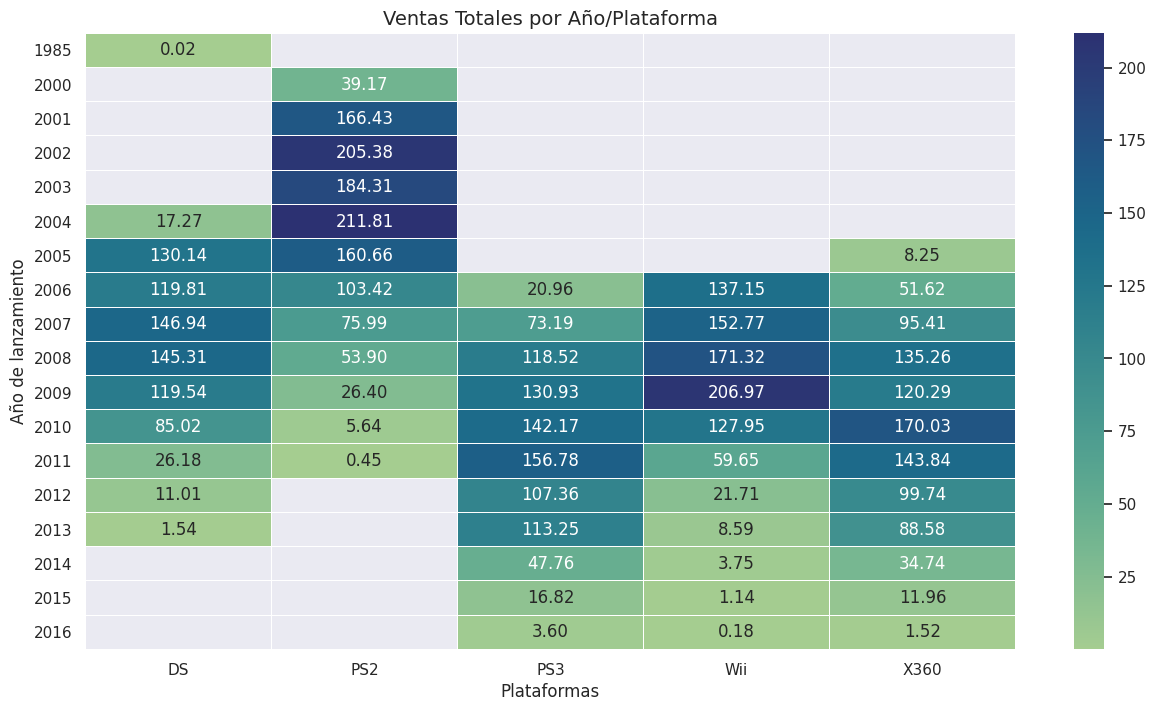

In [24]:
sns.set(rc={'figure.figsize': [15,8]})
sns.heatmap(pivot_df_filtered, annot=True, fmt='.2f', cmap='crest', linewidth=.01)
plt.title('Ventas Totales por Año/Plataforma', fontsize= 14)
plt.xlabel('Plataformas')
plt.ylabel('Año de lanzamiento')

### Observación

En el Heatmap se observa que la plataforma DS tiene ventas para el año 1985, sin embargo, esa plataforma se lanzó en el año 2004. Por tanto, se buscarán los videojuegos en cuestión de ese año con un filtro.

In [25]:
df[(df['platform'] == 'DS') & (df['year_of_release']== 1985)]

name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
15957       0.0       0.0      0.02          0.0         0.02          68.0   

       user_score   rating  
15957         7.4  unknown

### Observación

Se tiene un sólo videojuego registrado para ese año Strongest Tokyo University Shogi DS, el cuál fue lanzado en el 2008 en japon. Por lo tanto, se cambiará el año de 1985 por 2008.

In [26]:
df.loc[15957, 'year_of_release'] = 2008

In [27]:
df[(df['platform'] == 'DS') & (df['name']== 'Strongest Tokyo University Shogi DS')]

name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             2008  Action   

       na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
15957       0.0       0.0      0.02          0.0         0.02          68.0   

       user_score   rating  
15957         7.4  unknown

In [28]:
platform_max_sales_1= ['DS', 'Wii', 'PS3', 'X360', 'PS2']
df_filtered_1= df[df['platform'].isin(platform_max_sales_1)]
df_filtered_1.head()

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score  \
0     28.96      3.77         8.45        82.54          76.0         8.0   
2     12.76      3.79         3.29        35.52          82.0         8.3   
3     10.93      3.28         2.95        32.77          80.0         8.0   
6      9.14      6.50         2.88        29.80          89.0         8.5   
7      9.18      2.93         2.84        28.91          58.0         6.6   

  rating  
0      E  
2      E  
3      E  
6      E  
7      E

In [29]:
pivot_df_filtered_1= df_filtered_1.pivot_table(index='year_of_release',
                                    columns='platform',
                                    values='total_sales',
                                    aggfunc='sum')

Text(153.75, 0.5, 'Año de lanzamiento')

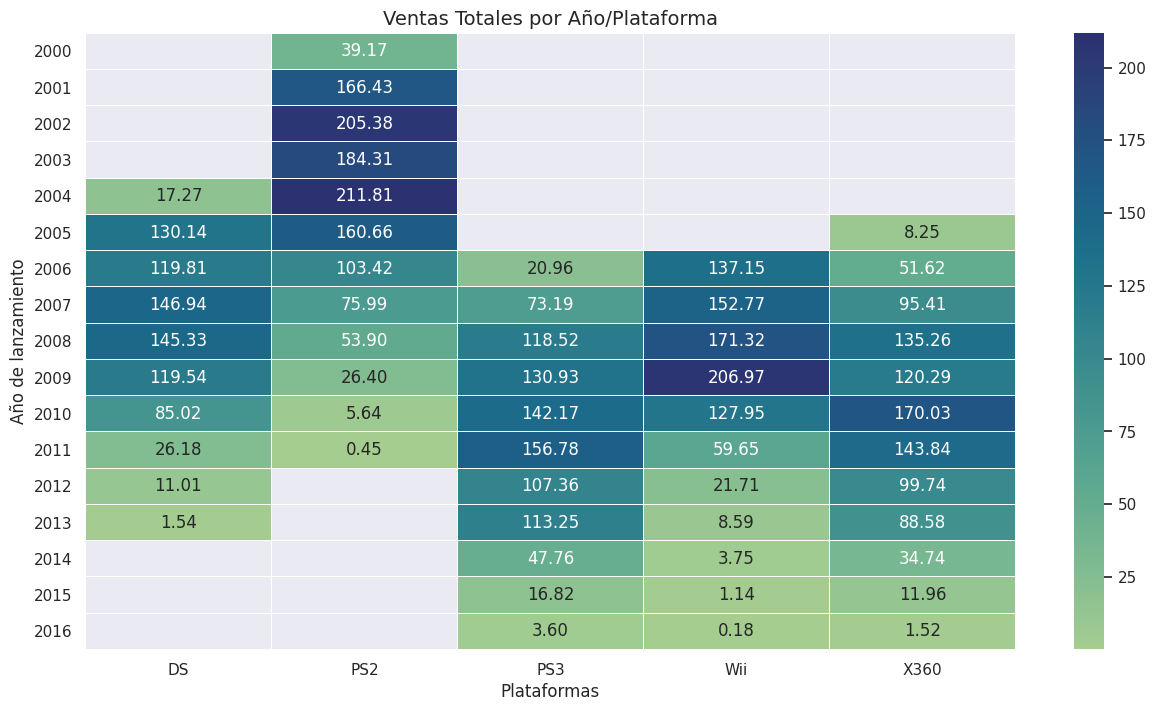

In [30]:
sns.set(rc={'figure.figsize': [15,8]})
sns.heatmap(pivot_df_filtered_1, annot=True, fmt='.2f', cmap='crest', linewidth=.01)
plt.title('Ventas Totales por Año/Plataforma', fontsize= 14)
plt.xlabel('Plataformas')
plt.ylabel('Año de lanzamiento')

### Observaciones:

podemos visualizar en nuestro Headmap, que ya la mayorias de estas 5 plataformas para la fecha actual si nos fijamos bien 2 de ellas (DS, PS2) ya no estan generando ganancias y las otras 3 (PS3, Wii, X360) si estan generando aun un poco de ingresos pero ya estan por desaparecer lo podemos evidenciar con los pocos ingresos generados en los ultimos años en los cuales los ingresos han ido decayendo, vamos a estudiar el porque de esto. 

Text(0.5, 0, 'Años')

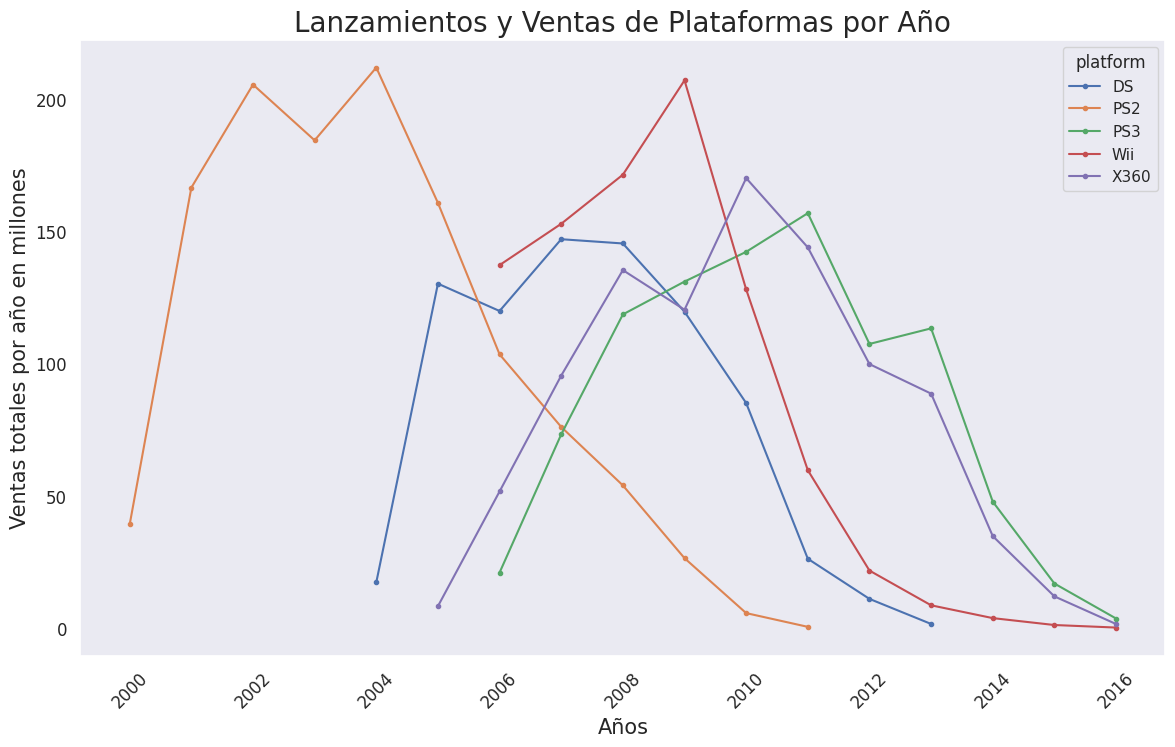

In [31]:
pivot_df_filtered_1.plot(
                       kind= 'line',
                       style='.-',
                       figsize= [14,8],
                       fontsize= 12,
                       rot= 45,
                       grid= False
                       )
plt.title('Lanzamientos y Ventas de Plataformas por Año', fontsize= 20)
plt.ylabel('Ventas totales por año en millones', fontsize= 15)
plt.xlabel('Años', fontsize= 15)

### Observacion:

La plataforma/consola con mayores ventas es PS2 desde el 2000 hasta el 2004. En el 2004 son lanzadas al mercado otras plataformas, por lo que la competencia crece y con ello las ventas de PS2 comienzan a disminuir.

Luego podemos onservar que la proxima plataforma/consola con mayores ventas es el Wii luego de 3 años de haberse lanzado al mercado en el 2009 podemos ver un gran aumentos en las ventas, luego de ese año las ventas empezaron a caer, tomando luego el primer lugar el X360 en el año 2010 luego de ese año las ventas tambien empiezan a caer para X360, tomando ahora el primer lugar el PS3 en el año 2011.

Podemos observar en el grafico que las ventas de todas las desde el año 2011 fueron decayendo hasta el año 2016 donde se puede evidenciar que en wii se mantiene como la 3era consola mas vendida, el X360 en la segunda posicion y el PS3 en la primera posicion. teniendo encuenta que la diferencia de ventas no es muy grande estan las 3 muy cerca entre si.

# tiempo de vida de las plataformas

In [32]:
def era_group(year):
    """
    La función devuelve el grupo de época de los juegos de acuerdo con el año de lanzamiento usando estas reglas:
    —'retro'   para año < 2000
    —'modern'  para 2000 <= año < 2010
    —'recent'  para año >= 2010
    —'unknown' para buscar valores año (NaN)
    """

    if year < 2000:
        return 'retro'
    elif year < 2010:
        return 'modern'
    else:
        return 'recent'


df['era_group'] = df['year_of_release'].apply(era_group)
print(df.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score  \
0     28.96      3.77         8.45        82.54          76.0         8.0   
1      3.58      6.81         0.77        40.24          69.5         7.7   
2     12.76      3.79         3.29        35.52          82.0         8.3   
3     10.93      3.28         2.95        32.77          80.0         8.0   
4      8.89     10.22         1.00        31.38          74.0         7.8   

    rating era_group  
0        E    modern  
1  u

In [33]:
# se filtra el DataFrame con las plataformas retro
df_retro= df[df['era_group'] == 'retro']
df_retro.head()

name platform  year_of_release         genre  \
1             Super Mario Bros.      NES             1985      Platform   
4      Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                        Tetris       GB             1989        Puzzle   
9                     Duck Hunt      NES             1984       Shooter   
12  Pokemon Gold/Pokemon Silver       GB             1999  Role-Playing   

    na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
1      29.08      3.58      6.81         0.77        40.24          69.5   
4      11.27      8.89     10.22         1.00        31.38          74.0   
5      23.20      2.26      4.22         0.58        30.26          70.0   
9      26.93      0.63      0.28         0.47        28.31          73.0   
12      9.00      6.18      7.20         0.71        23.09          74.0   

    user_score   rating era_group  
1          7.7  unknown     retro  
4          7.8  unknown     retro  
5          7.5  unknown     retro  
9          7.4  unknown     retro  
12         7.8  unknown     retro

In [34]:
df_retro_sales= df_retro.groupby('platform')['total_sales'].sum().sort_values()
df_retro_sales

platform
PCFX      0.03
GG        0.04
3DO       0.10
TG16      0.16
WS        0.46
NG        1.44
SCD       1.86
DC        8.54
GEN      28.35
SAT      33.59
PC       50.04
2600     86.48
N64     180.71
SNES    200.04
GB      225.43
NES     251.05
PS      586.88
Name: total_sales, dtype: float64

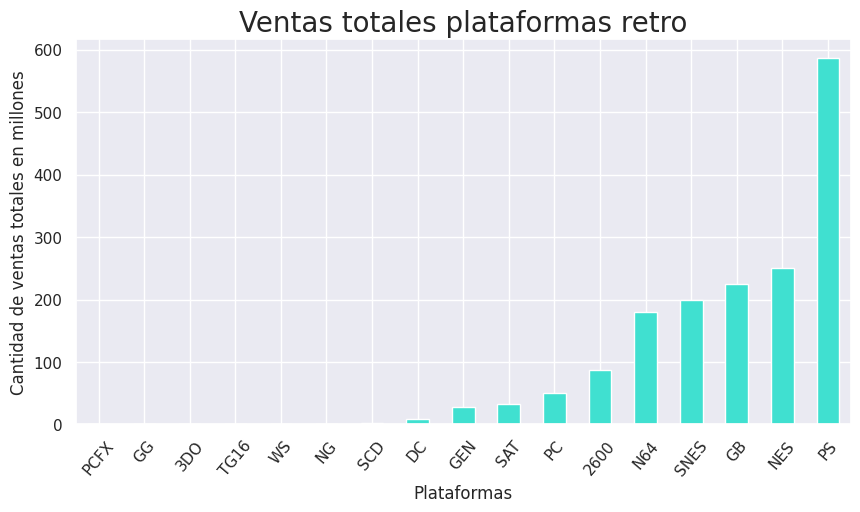

In [35]:
df_retro_sales.plot(kind= 'bar',
             figsize= [10,5],
              rot= 50,
              color= 'Turquoise' )

plt.title('Ventas totales plataformas retro', fontsize= 20)
plt.ylabel('Cantidad de ventas totales en millones')
plt.xlabel('Plataformas')
plt.show()

### Observacion:

Las 10 plataformas retro (con lanzamiento menores al año 2000) con más ventas globales entre 1980 y 2000 fueron DC, GEN, SAT, PC, 2600, N64, SNES, GB, NES y PS.

# Ventas globales de las plataformas populares retro en la época reciente

In [36]:
# se crea una lista con las plataformas retro

platform_retro_list= df_retro_sales.index
platform_retro_list

Index(['PCFX', 'GG', '3DO', 'TG16', 'WS', 'NG', 'SCD', 'DC', 'GEN', 'SAT',
       'PC', '2600', 'N64', 'SNES', 'GB', 'NES', 'PS'],
      dtype='object', name='platform')

In [37]:
# se filtra el DataFrame df con el método isin() solo con las 5 plataformas retro con más ventas

df_retro_recent= df[df['platform'].isin(platform_retro_list)]
df_retro_recent= df_retro_recent[df_retro_recent['year_of_release'] > 2000]
df_retro_recent.head()

name platform  year_of_release  \
85                               The Sims 3       PC             2009   
138                       World of Warcraft       PC             2004   
192                              Diablo III       PC             2012   
218          StarCraft II: Wings of Liberty       PC             2010   
288  World of Warcraft: The Burning Crusade       PC             2007   

            genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  \
85     Simulation      0.99      6.42       0.0         0.60         8.01   
138  Role-Playing      0.08      6.21       0.0         0.00         6.29   
192  Role-Playing      2.44      2.16       0.0         0.54         5.14   
218      Strategy      2.57      1.68       0.0         0.58         4.83   
288  Role-Playing      2.57      1.52       0.0         0.00         4.09   

     critic_score  user_score rating era_group  
85           86.0         7.6      T    modern  
138          93.0         7.3      T    modern  
192          88.0         4.0      M    recent  
218          93.0         8.2      T    recent  
288          91.0         7.9      T    modern

In [38]:
df_retro_recent_total_sales= df_retro_recent.groupby('platform')['total_sales'].sum()
df_retro_recent_total_sales

platform
DC       1.42
GB       9.24
N64      3.33
PC     201.06
PS      44.33
WS       0.28
Name: total_sales, dtype: float64

In [39]:
# se concatena el Series df_retro_recent y df_retro_recent_total_sales
concat_retro_platforms = pd.concat([df_retro_sales, df_retro_recent_total_sales], axis='columns')

# se cambia el nombre de las columnas
concat_retro_platforms.columns = ['total_sales_before_2000', 'total_sales_after_2000']
concat_retro_platforms['total_sales_after_2000']= concat_retro_platforms['total_sales_after_2000'].fillna(0)
concat_retro_platforms.reset_index()

platform  total_sales_before_2000  total_sales_after_2000
0      PCFX                     0.03                    0.00
1        GG                     0.04                    0.00
2       3DO                     0.10                    0.00
3      TG16                     0.16                    0.00
4        WS                     0.46                    0.28
5        NG                     1.44                    0.00
6       SCD                     1.86                    0.00
7        DC                     8.54                    1.42
8       GEN                    28.35                    0.00
9       SAT                    33.59                    0.00
10       PC                    50.04                  201.06
11     2600                    86.48                    0.00
12      N64                   180.71                    3.33
13     SNES                   200.04                    0.00
14       GB                   225.43                    9.24
15      NES                   251.05                    0.00
16       PS                   586.88                   44.33

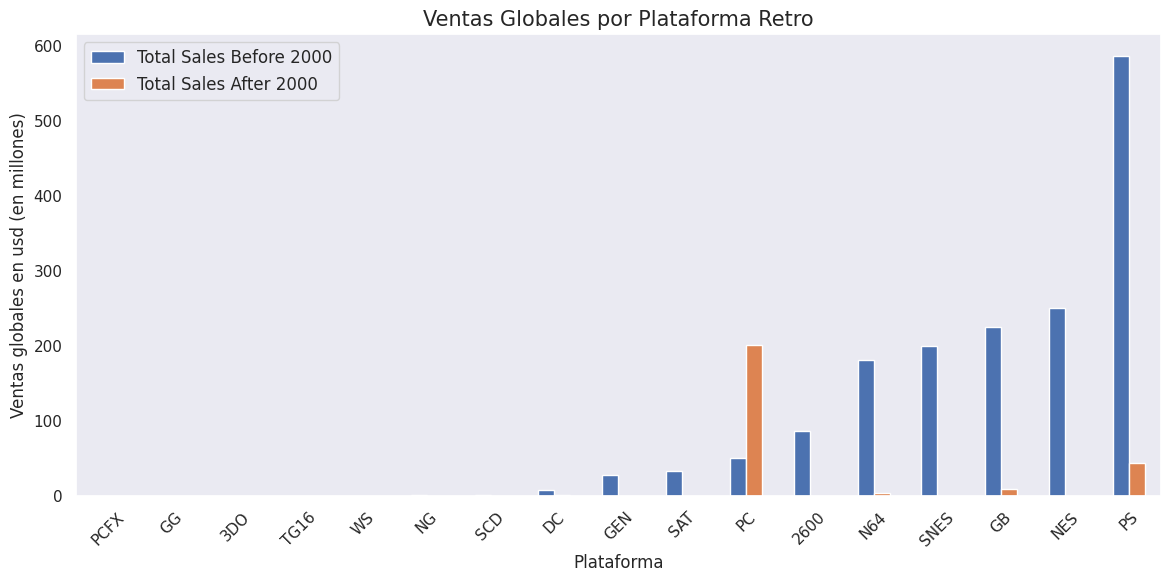

In [40]:
# se grafican las ventas globales para las plataformas retro
concat_retro_platforms.plot(kind= 'bar',
       rot= 45,
       figsize= [14,6],
       grid= False
       )

plt.title('Ventas Globales por Plataforma Retro', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.legend(['Total Sales Before 2000', 'Total Sales After 2000'], fontsize= 12)
plt.show()


### Observaciones:

En nuestra visualizacion podemos evidenciar que de las 10 plataformas existentes antes de los 2000, solo 3 llegaron a generar ingresos notables despues de los 200 las cuales son (GB, PS y PC) siendo PC la plataforma con mayores ventas entre el grupo de 3 mencionado anteriormente. 


Es impresionante como PC en la unica plataforma que logro sobrevivir a nuevas plataformas luego de los años 2000 teniendo en cuenta que esta plataforma en sus tiempo se encontraba en el top 7 de popularidad. siendo PS la mas popular para la epoca la cual en la actualidad fue superada por PC.

#  tiempo de vida de las plataformas

In [41]:
# se agrupan los datos por plataforma y se calcula el año mínimo y el máximo 
lifes_platforms = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
# se renombran las columnas
lifes_platforms.columns = ['year_release_min', 'year_release_max']
lifes_platforms

year_release_min  year_release_max
platform                                    
2600                  1980              1989
3DO                   1994              1995
3DS                   2011              2016
DC                    1998              2008
DS                    2004              2013
GB                    1988              2001
GBA                   2000              2007
GC                    2001              2007
GEN                   1990              1994
GG                    1992              1992
N64                   1996              2002
NES                   1983              1994
NG                    1993              1996
PC                    1985              2016
PCFX                  1996              1996
PS                    1994              2003
PS2                   2000              2011
PS3                   2006              2016
PS4                   2013              2016
PSP                   2004              2015
PSV                   2011              2016
SAT                   1994              1999
SCD                   1993              1994
SNES                  1990              1999
TG16                  1995              1995
WS                    1999              2001
Wii                   2006              2016
WiiU                  2012              2016
X360                  2005              2016
XB                    2000              2008
XOne                  2013              2016

In [42]:
# se ordenan los datos de menor a mayor con base a la columna 'year_release_min'
# así estarán ordenadas las plataformas de acuerdo al primer lanzamiento de un videojuego

lifes_platforms= lifes_platforms.sort_values(by='year_release_min')
lifes_platforms

year_release_min  year_release_max
platform                                    
2600                  1980              1989
NES                   1983              1994
PC                    1985              2016
GB                    1988              2001
SNES                  1990              1999
GEN                   1990              1994
GG                    1992              1992
SCD                   1993              1994
NG                    1993              1996
SAT                   1994              1999
PS                    1994              2003
3DO                   1994              1995
TG16                  1995              1995
PCFX                  1996              1996
N64                   1996              2002
DC                    1998              2008
WS                    1999              2001
GBA                   2000              2007
XB                    2000              2008
PS2                   2000              2011
GC                    2001              2007
DS                    2004              2013
PSP                   2004              2015
X360                  2005              2016
PS3                   2006              2016
Wii                   2006              2016
PSV                   2011              2016
3DS                   2011              2016
WiiU                  2012              2016
PS4                   2013              2016
XOne                  2013              2016

In [43]:
# se crea una columna 'lifespan' para calcular el tiempo de vida
lifes_platforms['lifes'] = lifes_platforms['year_release_max'] - lifes_platforms['year_release_min']
lifes_platforms['appear']= lifes_platforms['year_release_min'].diff().fillna(0) 
lifes_platforms= lifes_platforms.sort_values(by='lifes')
lifes_platforms

year_release_min  year_release_max  lifes  appear
platform                                                   
PCFX                  1996              1996      0     1.0
GG                    1992              1992      0     2.0
TG16                  1995              1995      0     1.0
SCD                   1993              1994      1     1.0
3DO                   1994              1995      1     0.0
WS                    1999              2001      2     1.0
XOne                  2013              2016      3     0.0
PS4                   2013              2016      3     1.0
NG                    1993              1996      3     0.0
WiiU                  2012              2016      4     1.0
GEN                   1990              1994      4     0.0
SAT                   1994              1999      5     1.0
PSV                   2011              2016      5     5.0
3DS                   2011              2016      5     0.0
N64                   1996              2002      6     0.0
GC                    2001              2007      6     1.0
GBA                   2000              2007      7     1.0
XB                    2000              2008      8     0.0
DS                    2004              2013      9     3.0
2600                  1980              1989      9     0.0
PS                    1994              2003      9     0.0
SNES                  1990              1999      9     2.0
PS3                   2006              2016     10     1.0
Wii                   2006              2016     10     0.0
DC                    1998              2008     10     2.0
PSP                   2004              2015     11     0.0
X360                  2005              2016     11     1.0
NES                   1983              1994     11     3.0
PS2                   2000              2011     11     0.0
GB                    1988              2001     13     3.0
PC                    1985              2016     31     2.0

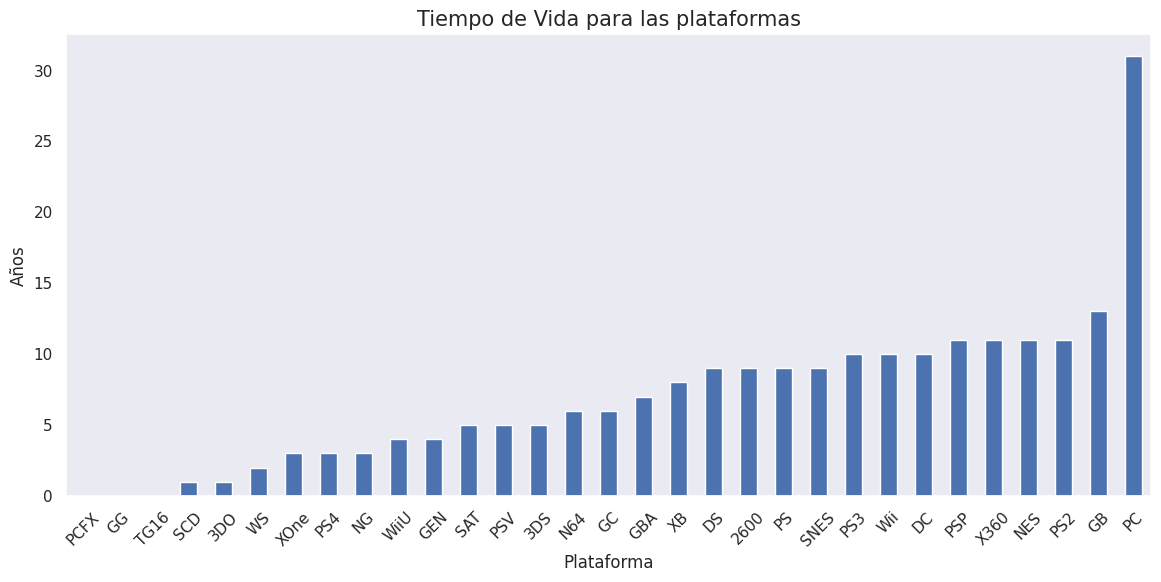

In [44]:
# se grafica el tiempo de vida de las plataformas
lifes_platforms['lifes'].plot(kind= 'bar',
       rot= 45,
       figsize= [14,6],
       grid= False
       )

plt.title('Tiempo de Vida para las plataformas', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Años', fontsize= 12)

plt.show()

### Observaciones:

Con los nuevos datos analizados podemos evidenciar que de todas las plataformas retro, PC es la unica que se mantiene con vida en el mercado con 31 años desde que fue lanzada.

In [45]:
# se calcula el tiempo de vida promedio para las plataformas 'retro'
print('El tiempo de vida promedio para las plataformas Retro es:')
lifes_platforms[lifes_platforms.index.isin(platform_retro_list)]['lifes'].mean()

El tiempo de vida promedio para las plataformas Retro es:


6.705882352941177

In [46]:
# se guardan en un array las plataformas de la era reciente, filtrando el DataFrame df
modern_recent_platforms_list = df[~(df['era_group'] == 'retro')]['platform'].unique()
modern_recent_platforms_list


array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC', 'WS'],
      dtype=object)

In [47]:
# Eliminamos de la lista anterior las plataformas lanzadas antes del 2000
# DC, WS, N64, PS, GB, PC, se elimina de la lista de plataformas recientes
plataformas_a_eliminar = ['PC', 'DC', 'WS', 'N64', 'PS', 'GB']

# Filtrar plataformas que no están en la lista de eliminación
modern_recent_platforms_list = [plataformas for plataformas in modern_recent_platforms_list 
                                if plataformas not in plataformas_a_eliminar]
modern_recent_platforms_list

['Wii',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'GBA',
 'PS4',
 '3DS',
 'XB',
 'PSP',
 'XOne',
 'WiiU',
 'GC',
 'PSV']

In [48]:
# se calcula el tiempo de vida promedio de las plataformas recientes
print('El tiempo de vida promedio para las plataformas Recientes es:')
lifes_platforms[lifes_platforms.index.isin(modern_recent_platforms_list)]['lifes'].mean()


El tiempo de vida promedio para las plataformas Recientes es:


7.357142857142857

In [49]:
#Se calcula el promedio en que tardo cada plataforma en aparecer

print('El tiempo promedio en que tardo cada plataforma en aparecer es:')
lifes_platforms['appear'].mean()

El tiempo promedio en que tardo cada plataforma en aparecer es:


1.064516129032258

### Obervaciones:

Las 5 plataformas con más ventas globales son DS, PS2, PS3, X360 y Wii. Del año 2000 hasta 2004 la consola PS2 tenía mayores ventas, pero a partir del 2004 aparecen otras plataformas de nueva generción. Lo que conlleva a que las ventas del PS2 diminuyan y las de las nuevas plataformas aumenten. El Nintendo Wii tuvo la mayor cantidad de ventas globales a partir de su lanzamiento en 2006 hasta el 2009. A partir del 2010 las cosolas que lideran las ventas globales son X360 y PS3.

Las 10 platformas retro (lanzadas antes del 2000) que solían ser populares eran DC, GEN, SAT, PC, 2600, N64, SNES, GB, NES y PS. Sim embargo, a partir del año 2000 sus ventas desaparecen en algunas plataformas y en otras se pueden apreciar ventas pero muy bajas la unica que siguio en aumento fue PC de manera considerable, por lo que ya no lideran las ventas globales, lo cuál se debe al lanzamiento de consolas de nueva generación. Es importante recalcar que la única plataforma que se ha mantenido vigente y que aumentaron sus ventas fue para PC, sus ventas aumentaron aproximadamente en 401.80 %.

En promedio las plataformas retro su tiempo de vida es 6.71 años, Mientras que, para plataformas lanzadas a partir del 2000 su tiempo de vida promedio es 7.36 años.

El tiempo promedio que tardo en lanzarse una plataforma nueva al mercado es de 1.07 años.

# Plataformas líderes en ventas

Dado que el tiempo de vida de las plataformas esta entre 6 y 8 años y que sólo una plataforma retro se mantienen vigente, o bien, con ventas después del 2000, 'PC'. Además, las plataformas con más ventas globales después del 2010 son PS3 y X360, asimismo, la consola PS4 es de nueva generación por tanto lo más probable es que desplace al PS3. Con base a lo anterior, sólo se tomarán en cuenta los datos a partir del año 2014, para tomar en cuenta solo plataformas con ventas relevantes y de nueva generación.

In [50]:
# se filtra el DataFrame df para guardar los datos que pertencen al año 2014 en adelante

df_filtered_2014_2016= df[df['year_of_release']> 2013]
df_filtered_2014_2016

name platform  year_of_release  \
31                     Call of Duty: Black Ops 3      PS4             2015   
42                            Grand Theft Auto V      PS4             2014   
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                       FIFA 16      PS4             2015   
87                  Star Wars Battlefront (2015)      PS4             2015   
...                                          ...      ...              ...   
16703                           Strawberry Nauts      PSV             2016   
16707                           Aiyoku no Eustia      PSV             2014   
16710              Samurai Warriors: Sanada Maru      PS3             2016   
16712                    Haitaka no Psychedelica      PSV             2016   
16714                        Winning Post 8 2016      PSV             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  \
31          Shooter      6.03      5.86      0.36         2.38        14.63   
42           Action      3.96      6.31      0.38         1.97        12.62   
47     Role-Playing      4.35      3.49      3.10         0.74        11.68   
77           Sports      1.12      6.12      0.06         1.28         8.58   
87          Shooter      2.99      3.49      0.22         1.28         7.98   
...             ...       ...       ...       ...          ...          ...   
16703     Adventure      0.00      0.00      0.01         0.00         0.01   
16707          Misc      0.00      0.00      0.01         0.00         0.01   
16710        Action      0.00      0.00      0.01         0.00         0.01   
16712     Adventure      0.00      0.00      0.01         0.00         0.01   
16714    Simulation      0.00      0.00      0.01         0.00         0.01   

       critic_score  user_score   rating era_group  
31             73.0         7.4  unknown    recent  
42             97.0         8.3        M    recent  
47             74.0         7.8  unknown    recent  
77             82.0         4.3        E    recent  
87             73.0         7.4  unknown    recent  
...             ...         ...      ...       ...  
16703          66.0         7.6  unknown    recent  
16707          69.0         7.1  unknown    recent  
16710          68.0         7.4  unknown    recent  
16712          66.0         7.6  unknown    recent  
16714          70.0         7.5  unknown    recent  

[1689 rows x 13 columns]

In [51]:
# se agrupan los datos por plataforma con la suma de sus ventas totales

sales_total_2014_2016= df_filtered_2014_2016.groupby('platform')['total_sales'].sum()
sales_total_2014_2016= sales_total_2014_2016.sort_values()


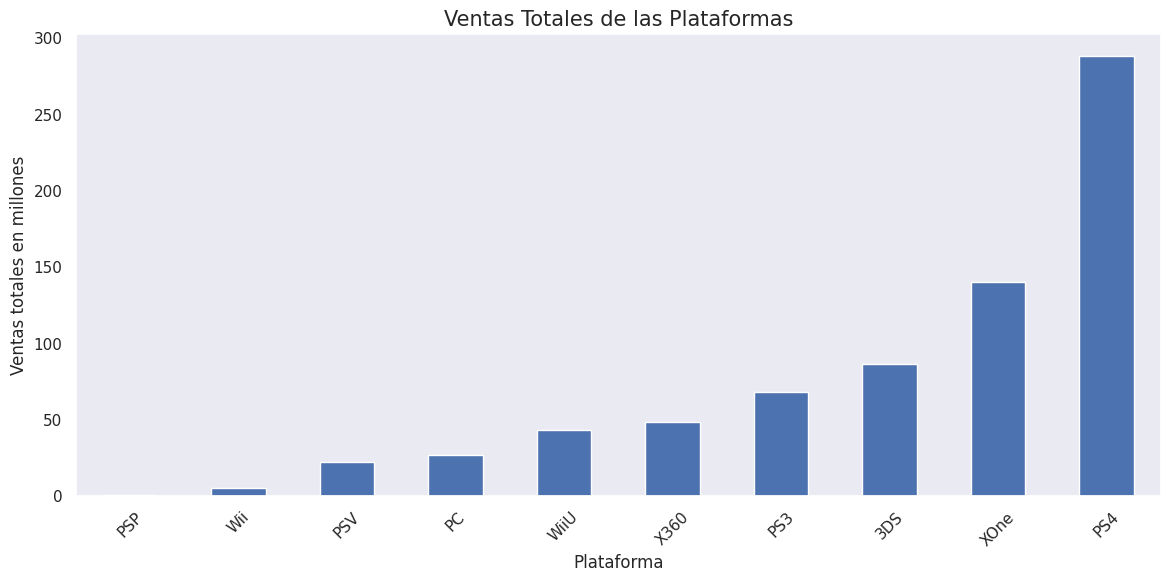

In [52]:
sales_total_2014_2016.plot(kind= 'bar',
       rot= 45,
       figsize= [14,6],
       grid= False
       )

plt.title('Ventas Totales de las Plataformas', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Ventas totales en millones', fontsize= 12)

plt.show()

### Observaciones:

Como podemos ver en nuestro grafico, se puede verificar que cada vez que salen plataformas nuevas las anteriores se van desplazando y van perdiendo ventas al pasar los años hasta que desaparecen por completo.

Tambien podemos observar que la plataforma PSP para estas fechas selecionadas, estaba ya casi desapareciendo, PSP termina de generar registros de ventas en el año 2015. 

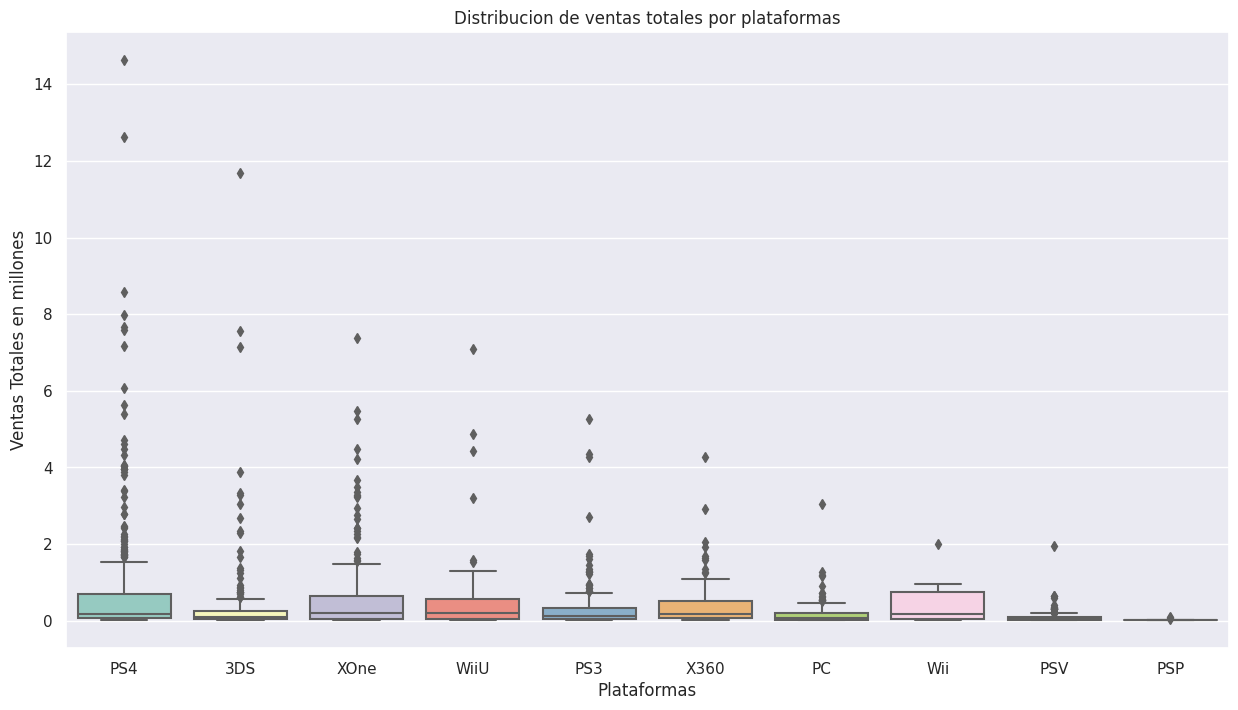

In [53]:
sns.boxplot(x="platform", y="total_sales", data=df_filtered_2014_2016, palette="Set3") #Creamos el diagrama de caja
plt.xlabel("Plataformas")
plt.ylabel("Ventas Totales en millones")
plt.title("Distribucion de ventas totales por plataformas")
plt.show() #lo imprimimos

### Observaciones:

Podemos observar en nuestro diagrama de caja que los datos se encuentran sesgados de forma positiva hacia la derecha, lo que nos indica que la media es mayor que la mediana.

tambien podemos observar que el promedio de ventas entre las plataformas en muy parecido la mediana es igual o muy parecidas entre si, se mantiene alrededor de menos de 1 millon en ventas, por otro lado el promedio maximo de ventas se situa por debajo de los 2 millones en ventas, las plataformas PS4, XOne, WiiU, X360 y Wii, son las plataformas con promedios de ventas importantes. 

Dos de estas 5 plataformas tienen una gran cantidad de valores atipicos (PS4 y XOne), lo que nos indica que estas dos plataformas son las que tienen mayores ventas totales, muy por encima a su promedio. En otras palabras, estas plataformas tienen ventas excepcionales que superan por mucho el rendimiento promedio de las demás plataformas

#  Graficos de dispersión para calcular la correlación entre las reseñas y las ventas.

In [54]:
#Filtramos el DataFrame para que solo nos muestre los datos de la plataforma PS4

df_ps4= df_filtered_2014_2016[df_filtered_2014_2016['platform'] == 'PS4']
df_ps4

name platform  year_of_release         genre  \
31          Call of Duty: Black Ops 3      PS4             2015       Shooter   
42                 Grand Theft Auto V      PS4             2014        Action   
77                            FIFA 16      PS4             2015        Sports   
87       Star Wars Battlefront (2015)      PS4             2015       Shooter   
92     Call of Duty: Advanced Warfare      PS4             2014       Shooter   
...                               ...      ...              ...           ...   
16500                     Root Letter      PS4             2016     Adventure   
16503               Shin Hayarigami 2      PS4             2016     Adventure   
16526                      Dungeons 2      PS4             2016  Role-Playing   
16530         Carmageddon: Max Damage      PS4             2016        Action   
16585   Farming 2017 - The Simulation      PS4             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
31         6.03      5.86      0.36         2.38        14.63          73.0   
42         3.96      6.31      0.38         1.97        12.62          97.0   
77         1.12      6.12      0.06         1.28         8.58          82.0   
87         2.99      3.49      0.22         1.28         7.98          73.0   
92         2.81      3.48      0.14         1.23         7.66          83.0   
...         ...       ...       ...          ...          ...           ...   
16500      0.00      0.00      0.01         0.00         0.01          69.0   
16503      0.00      0.00      0.01         0.00         0.01          66.0   
16526      0.01      0.00      0.00         0.00         0.01          61.0   
16530      0.01      0.00      0.00         0.00         0.01          51.0   
16585      0.00      0.01      0.00         0.00         0.01          70.0   

       user_score   rating era_group  
31            7.4  unknown    recent  
42            8.3        M    recent  
77            4.3        E    recent  
87            7.4  unknown    recent  
92            5.7        M    recent  
...           ...      ...       ...  
16500         7.5  unknown    recent  
16503         7.6  unknown    recent  
16526         7.9        T    recent  
16530         5.5        M    recent  
16585         7.5  unknown    recent  

[376 rows x 13 columns]

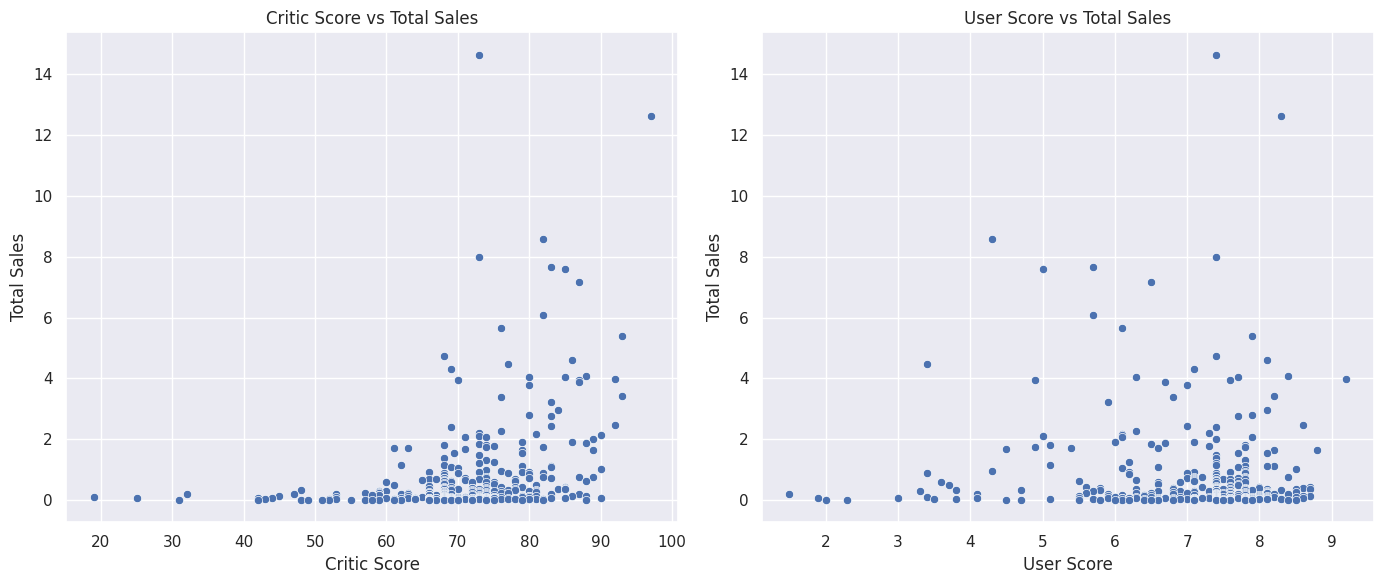

In [55]:
# Crear diagramas de dispersión
plt.figure(figsize=(14, 6))

# Puntuación crítica frente a ventas totales
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=df_ps4)
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# Puntuación del usuario frente a ventas totales
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=df_ps4)
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [56]:
# Calculate correlations
critic_corr = df_ps4['critic_score'].corr(df_ps4['total_sales'])
user_corr = df_ps4['user_score'].corr(df_ps4['total_sales'])

print('Correlación entre la puntuación de la crítica y las ventas totales: ', round(critic_corr, ndigits=2))
print('Correlación entre la puntuación de los usuarios y las ventas totales: ', round(user_corr, ndigits=2))

Correlación entre la puntuación de la crítica y las ventas totales:  0.35
Correlación entre la puntuación de los usuarios y las ventas totales:  -0.07


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

### Observaciones:

La correlación entre el puntaje crítico y las ventas totales es de aproximadamente 0,35, lo que indica una relación positiva moderada.

La correlación entre la puntuación del usuario y las ventas totales es de aproximadamente -0,07, lo que indica una relación negativa muy débil.

##### Correlación entre puntaje crítico y ventas totales (0,35):

Existe una relación positiva moderada.
Esto significa que, en general, a medida que el puntaje crítico aumenta, las ventas totales también tienden a aumentar.
Sin embargo, la correlación no es perfecta, lo que indica que otros factores también podrían influir en las ventas.


##### Correlación entre la puntuación del usuario y las ventas totales (-0,07):

Existe una relación negativa muy débil.
Esto significa que, en general, a medida que la puntuación del usuario aumenta, las ventas totales tienden a disminuir un poco.
Sin embargo, la correlación es tan débil que no podemos estar seguros de que exista una relación real entre estas dos variables.

# Ventas de los mismos juegos de PS4 en otras plataformas

In [57]:
# Creamos un array con los juegos del PS4 y lo guardamos en la nueva variable 
#Para luego realizar el filtro con los mismos juegos en otras plataformas

filtered_videogames= df_ps4['name'].values
filtered_videogames

array(['Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'FIFA 16',
       'Star Wars Battlefront (2015)', 'Call of Duty: Advanced Warfare',
       'FIFA 17', 'Fallout 4', 'FIFA 15', 'Destiny',
       "Uncharted 4: A Thief's End", 'The Last of Us',
       'Uncharted: The Nathan Drake Collection',
       'Call of Duty: Infinite Warfare', 'Minecraft', 'Battlefield 1',
       'Watch Dogs', 'Far Cry 4', 'The Witcher 3: Wild Hunt',
       "Assassin's Creed: Unity", 'Batman: Arkham Knight', 'NBA 2K16',
       "Tom Clancy's The Division",
       'Metal Gear Solid V: The Phantom Pain',
       "Assassin's Creed Syndicate", 'Madden NFL 16',
       'Middle-Earth: Shadow of Mordor', 'inFAMOUS: Second Son',
       'Mortal Kombat X', 'Bloodborne', 'NBA 2K15',
       'Need for Speed (2015)', 'Far Cry: Primal',
       "Tom Clancy's Rainbow Six: Siege", 'Madden NFL 15', 'Overwatch',
       'Battlefield: Hardline', 'Dying Light', 'DriveClub',
       'Dragon Age: Inquisition', 'Destiny: The Taken King',

In [58]:
df_xone= df_filtered_2014_2016[df_filtered_2014_2016['platform'] == 'XOne']
df_xone= df_xone[df_xone['name'].isin(filtered_videogames)]
df_xone

name platform  \
99                         Call of Duty: Black Ops 3     XOne   
165                               Grand Theft Auto V     XOne   
179                   Call of Duty: Advanced Warfare     XOne   
270                                        Fallout 4     XOne   
342                     Star Wars Battlefront (2015)     XOne   
...                                              ...      ...   
16630                       Sébastien Loeb Rally Evo     XOne   
16643                              Rugby Challenge 3     XOne   
16645                                         ZombiU     XOne   
16660                               Prison Architect     XOne   
16672  Metal Gear Solid V: The Definitive Experience     XOne   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
99                2015       Shooter      4.59      2.11      0.01   
165               2014        Action      2.81      2.19      0.00   
179               2014       Shooter      3.22      1.55      0.01   
270               2015  Role-Playing      2.51      1.32      0.01   
342               2015       Shooter      2.04      1.28      0.02   
...                ...           ...       ...       ...       ...   
16630             2016        Racing      0.00      0.01      0.00   
16643             2016        Sports      0.00      0.01      0.00   
16645             2016        Action      0.00      0.01      0.00   
16660             2016        Action      0.01      0.00      0.00   
16672             2016        Action      0.01      0.00      0.00   

       other_sales  total_sales  critic_score  user_score   rating era_group  
99            0.68         7.39          73.0         7.4  unknown    recent  
165           0.47         5.47          97.0         7.9        M    recent  
179           0.48         5.26          81.0         5.4        M    recent  
270           0.38         4.22          88.0         6.2        M    recent  
342           0.32         3.66          73.0         7.4  unknown    recent  
...            ...          ...           ...         ...      ...       ...  
16630         0.00         0.01          63.0         8.2        E    recent  
16643         0.00         0.01          75.0         6.6        E    recent  
16645         0.00         0.01          68.0         7.4  unknown    recent  
16660         0.00         0.01          74.0         6.7  unknown    recent  
16672         0.00         0.01          68.0         7.4        M    recent  

[205 rows x 13 columns]

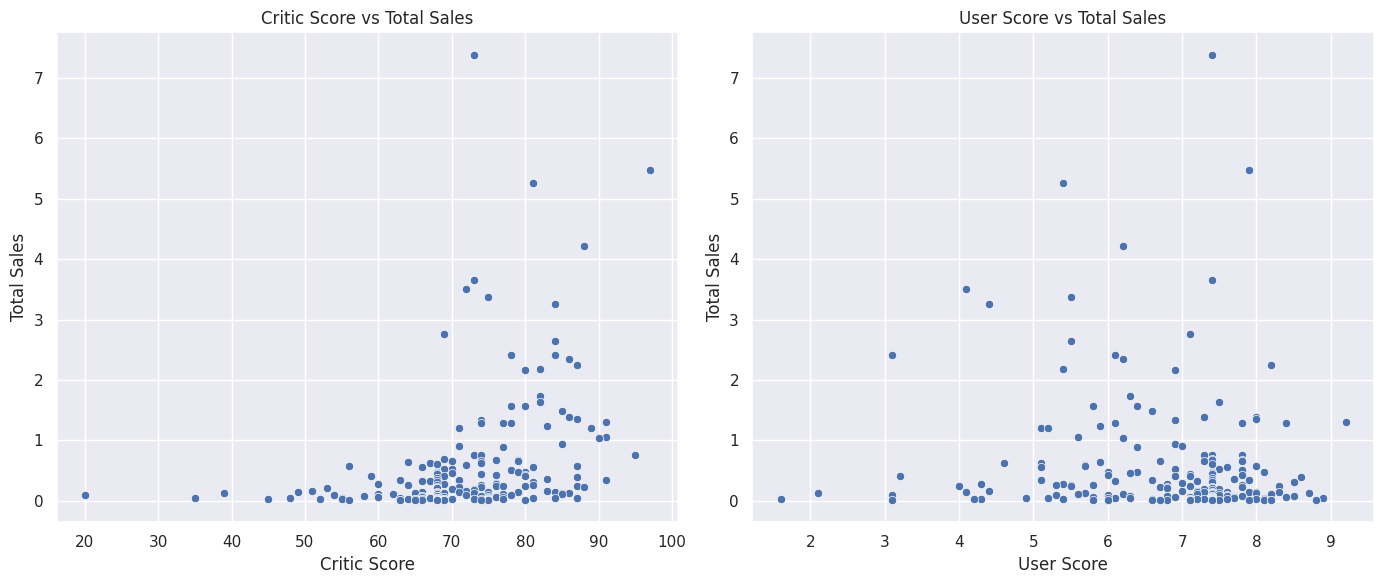

In [59]:
# Crear diagramas de dispersión
plt.figure(figsize=(14, 6))

# Puntuación crítica frente a ventas totales
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=df_xone)
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# Puntuación del usuario frente a ventas totales
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=df_xone)
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [60]:
# Calculate correlations
critic_corr = df_xone['critic_score'].corr(df_xone['total_sales'])
user_corr = df_xone['user_score'].corr(df_xone['total_sales'])

print('Correlación entre la puntuación de la crítica y las ventas totales: ', round(critic_corr, ndigits=2))
print('Correlación entre la puntuación de los usuarios y las ventas totales: ', round(user_corr, ndigits=2))

Correlación entre la puntuación de la crítica y las ventas totales:  0.35
Correlación entre la puntuación de los usuarios y las ventas totales:  -0.11


### Observaciones:

##### Correlación entre puntaje crítico y ventas totales (0,35):

Podemos observar que la comparacion de los mismos juegos de PS4 en la plataforma XOne, su correlacion entre critic_score y total_sales es igual a la plaforma PS4 (0.35) lo que quiere decir que Existe una relación positiva moderada. Esto significa que, en general, a medida que el puntaje crítico aumenta, las ventas totales también tienden a aumentar.

##### Correlación entre la puntuación del usuario y las ventas totales (-0,11):

Existe una relación negativa muy débil en este caso es un poco mas baja que la anterior pero podemos confirmas que los usuarios de ambas plataformas actuan de forma muy parecida.
Esto significa que, en general, a medida que la puntuación del usuario aumenta, las ventas totales tienden a disminuir un poco.

In [61]:
df_pc= df_filtered_2014_2016[df_filtered_2014_2016['platform'] == 'PC']
df_pc= df_pc[df_pc['name'].isin(filtered_videogames)]
df_pc

name platform  year_of_release  \
1530                           Fallout 4       PC             2015   
1677              Farming Simulator 2015       PC             2014   
1730                  Grand Theft Auto V       PC             2015   
2303            The Elder Scrolls Online       PC             2014   
2784             Dragon Age: Inquisition       PC             2014   
...                                  ...      ...              ...   
16463                   TrackMania Turbo       PC             2016   
16509                             Ride 2       PC             2016   
16518               Rugby World Cup 2015       PC             2015   
16631    The Amazing Spider-Man 2 (2014)       PC             2014   
16692  Metal Gear Solid V: Ground Zeroes       PC             2014   

              genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  \
1530   Role-Playing      0.51      0.67       0.0         0.10         1.28   
1677     Simulation      0.08      1.04       0.0         0.07         1.19   
1730         Action      0.39      0.69       0.0         0.09         1.17   
2303   Role-Playing      0.32      0.51       0.0         0.07         0.90   
2784   Role-Playing      0.33      0.34       0.0         0.06         0.73   
...             ...       ...       ...       ...          ...          ...   
16463        Action      0.00      0.01       0.0         0.00         0.01   
16509        Racing      0.00      0.01       0.0         0.00         0.01   
16518        Sports      0.00      0.01       0.0         0.00         0.01   
16631        Action      0.00      0.01       0.0         0.00         0.01   
16692        Action      0.00      0.01       0.0         0.00         0.01   

       critic_score  user_score   rating era_group  
1530           84.0         5.4        M    recent  
1677           70.0         7.5  unknown    recent  
1730           96.0         7.9        M    recent  
2303           71.0         5.7        M    recent  
2784           85.0         5.9        M    recent  
...             ...         ...      ...       ...  
16463          79.0         6.8        E    recent  
16509          78.0         7.9        E    recent  
16518          75.0         1.4        E    recent  
16631          68.0         7.4  unknown    recent  
16692          80.0         7.6        M    recent  

[95 rows x 13 columns]

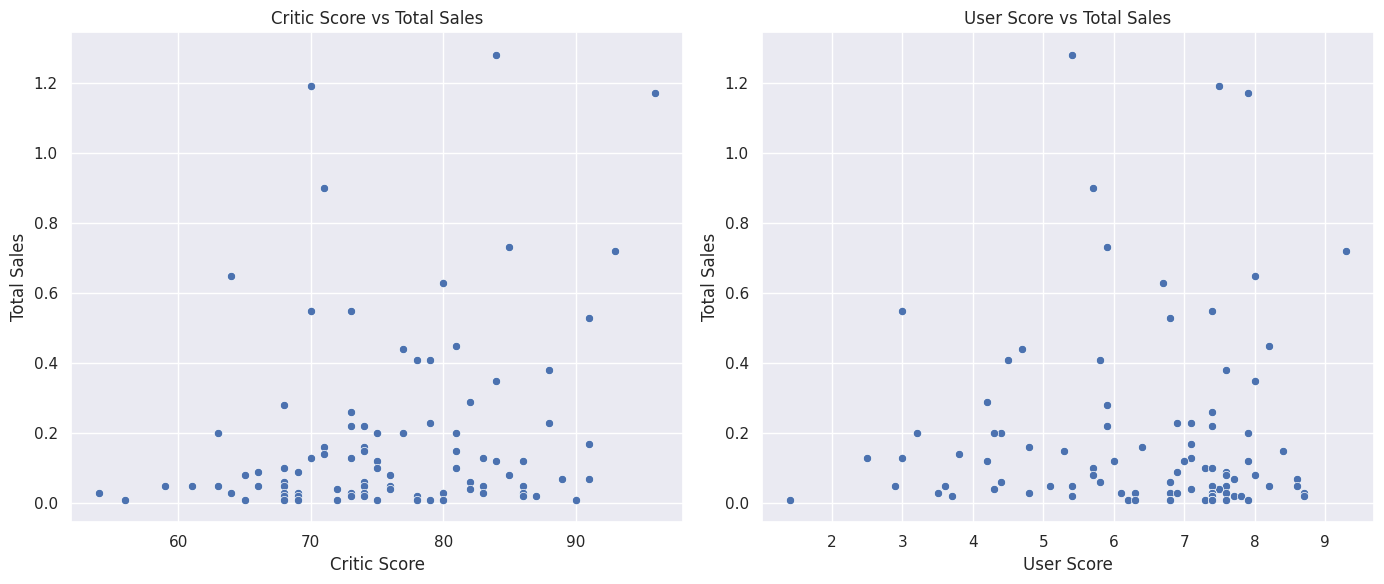

In [62]:
# Crear diagramas de dispersión
plt.figure(figsize=(14, 6))

# Puntuación crítica frente a ventas totales
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=df_pc)
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# Puntuación del usuario frente a ventas totales
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=df_pc)
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [63]:
# Calculate correlations
critic_corr = df_pc['critic_score'].corr(df_pc['total_sales'])
user_corr = df_pc['user_score'].corr(df_pc['total_sales'])

print('Correlación entre la puntuación de la crítica y las ventas totales: ', round(critic_corr, ndigits=2))
print('Correlación entre la puntuación de los usuarios y las ventas totales: ', round(user_corr, ndigits=2))

Correlación entre la puntuación de la crítica y las ventas totales:  0.25
Correlación entre la puntuación de los usuarios y las ventas totales:  0.04


### Observaciones:

##### Correlación entre puntaje crítico y ventas totales (0,25):

Podemos observar que la comparacion de los mismos juegos de PS4 en la plataforma PC, su correlacion entre critic_score y total_sales es muy parecida a las plaformas PS4 y XOne (0.35) lo que quiere decir que Existe una relación positiva moderada. Esto significa que, en general, a medida que el puntaje crítico aumenta, las ventas totales también tienden a aumentar.

##### Correlación entre la puntuación del usuario y las ventas totales (-0,04):

Existe una relación negativa muy débil en este caso es un poco mas baja que las anterior pero podemos confirmar que los usuarios de ambas plataformas actuan de forma muy parecida.
Esto significa que, en general, a medida que la puntuación del usuario aumenta, las ventas totales tienden a disminuir un poco.

# Distribución general de los juegos por género.

In [64]:
df_filtered_2014_2016.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  \
31       Shooter      6.03      5.86      0.36         2.38        14.63   
42        Action      3.96      6.31      0.38         1.97        12.62   
47  Role-Playing      4.35      3.49      3.10         0.74        11.68   
77        Sports      1.12      6.12      0.06         1.28         8.58   
87       Shooter      2.99      3.49      0.22         1.28         7.98   

    critic_score  user_score   rating era_group  
31          73.0         7.4  unknown    recent  
42          97.0         8.3        M    recent  
47          74.0         7.8  unknown    recent  
77          82.0         4.3        E    recent  
87          73.0         7.4  unknown    recent

In [65]:
group_genre_sales= df_filtered_2014_2016.groupby('genre')['total_sales'].sum().reset_index()
group_genre_sales= group_genre_sales.sort_values(by='total_sales')

Text(0, 0.5, 'Ventas Totales en millones')

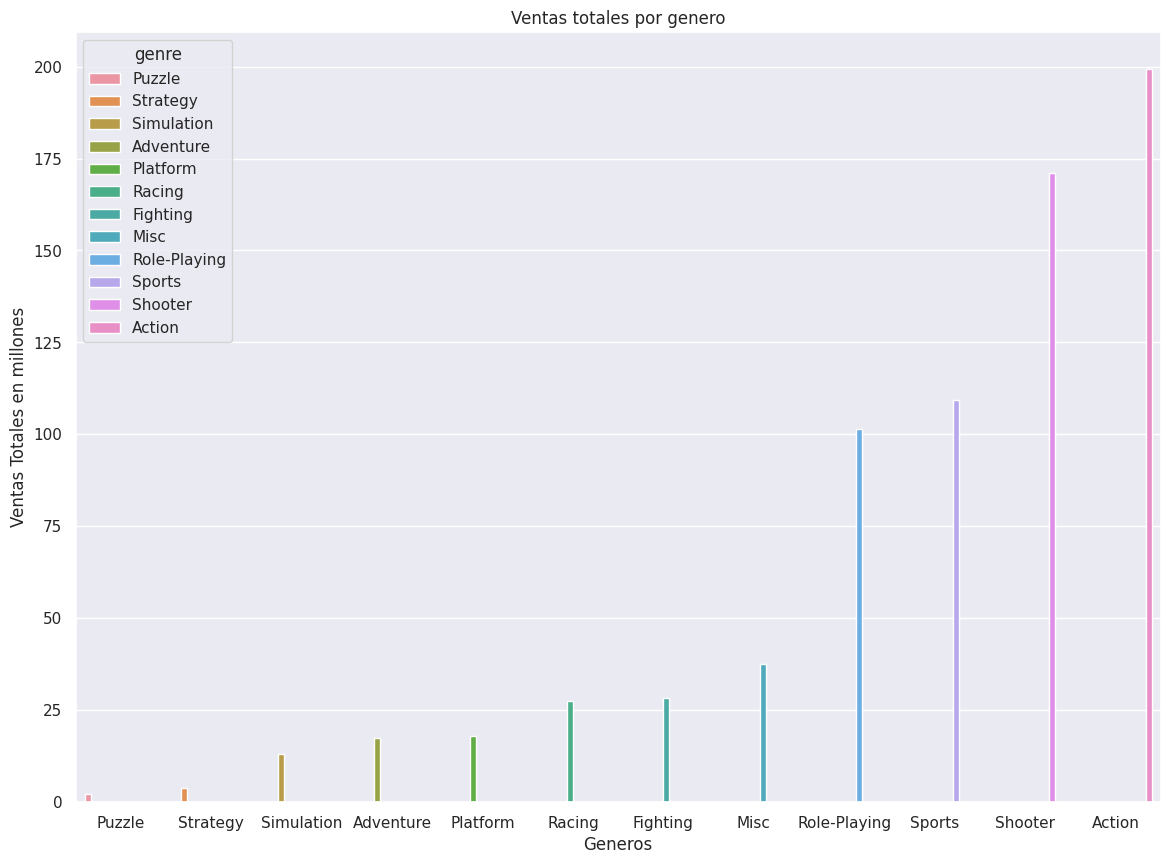

In [66]:
plt.figure(figsize=(14, 10))

sns.barplot(x="genre", y='total_sales',
             hue="genre",
             data=group_genre_sales)
plt.title('Ventas totales por genero')
plt.xlabel('Generos')
plt.ylabel('Ventas Totales en millones')

### Observaciones:

Podemos observar en nuestra grafica que los generos con mayores ventas son (Role-Playing, Sports, Shooter, Action) estos juegos estan alrededor de los 100 a 200 millones en ventas, y los generos con ventas menores son. (Puzzle, Strateggy, Simulation, Adventure, Platform, Racing, Fighting, Msc) estos juegos estan por debajo de los 40 millones en ventas.

# Perfil de usuario para cada región

In [67]:
#Agrupamos los datos por platform y na_sales para verificar las principales plataformas.

filtered_na= df_filtered_2014_2016.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
filtered_na

platform  na_sales
3      PS4     98.61
9     XOne     81.27
8     X360     28.30
0      3DS     22.64
2      PS3     22.05
7     WiiU     19.36
1       PC      7.23
5      PSV      2.52
6      Wii      2.08
4      PSP      0.00

Las 5 plataformas populares en NA son (PS4, XOne, X360, 3DS, PS3)

Text(0, 0.5, 'Ventas Totales en millones')

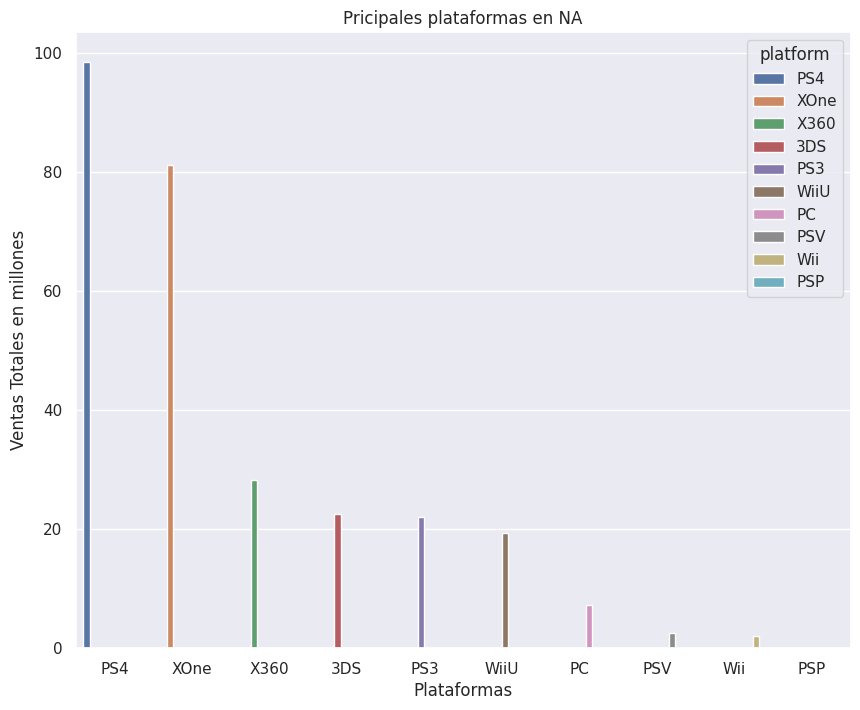

In [68]:
#Realizamos nuestro grafico 
plt.figure(figsize=(10, 8))

sns.barplot(x="platform", y='na_sales',
             hue="platform",
             data=filtered_na)
plt.title('Pricipales plataformas en NA')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales en millones')

### Observaciones:

Podemos confirmar las 5 plataformas preferidas en Norteamérica, siendo PS4 la más popular con casi 100 millones en ventas. La plataforma XOne es la segunda más popular, muy cercana a PS4, con un poco más de 80 millones en ventas. Por otro lado, tenemos las plataformas X360, 3DS, PS3 y WiiU, con ventas que oscilan entre los 19 y los 30 millones. Cabe destacar que, de las 5 plataformas, PS4 y XOne son las preferidas en Norteamérica.

In [69]:
#Agrupamos los datos por platform y eu_sales para verificar las principales plataformas.

filtered_eu= df_filtered_2014_2016.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
filtered_eu

platform  eu_sales
3      PS4    130.04
9     XOne     46.25
2      PS3     25.54
1       PC     17.97
0      3DS     16.12
8     X360     15.49
7     WiiU     13.15
5      PSV      3.53
6      Wii      2.59
4      PSP      0.00

Las 5 plataformas populares en EU son (PS4, XOne, PS3, PC, 3DS)

Text(0, 0.5, 'Ventas Totales en millones')

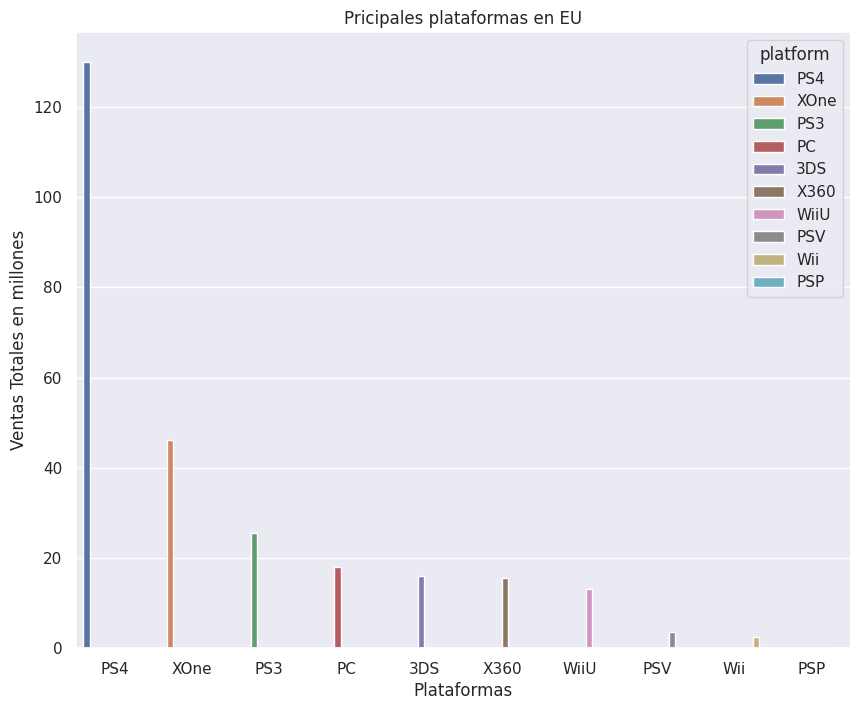

In [70]:
plt.figure(figsize=(10, 8))

sns.barplot(x="platform", y='eu_sales',
             hue="platform",
             data=filtered_eu)
plt.title('Pricipales plataformas en EU')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales en millones')

### Observaciones: 

Podemos confirmar las 5 plataformas preferidas en Europa, siendo PS4 la más popular con mas de 120 millones en ventas. La plataforma XOne es la segunda más popular, en este caso no tan cercana a PS4, con un poco más de 40 millones en ventas. Por otro lado, tenemos las plataformas PS3, PC, 3DS y X360, con ventas que oscilan entre los 17 y los 30 millones. Cabe destacar que, de las 5 plataformas, PS4 y XOne siguen siendo las preferidas en Europa.

In [71]:
#Agrupamos los datos por platform y jp_sales para verificar las principales plataformas.

filtered_jp= df_filtered_2014_2016.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
filtered_jp

platform  jp_sales
0      3DS     44.24
3      PS4     15.02
5      PSV     14.54
2      PS3     11.22
7     WiiU      7.31
4      PSP      0.36
9     XOne      0.32
8     X360      0.08
1       PC      0.00
6      Wii      0.00

Las 5 plataformas populares en JP son (3DS, PS4, PSV, PS3, WiiU)

Text(0, 0.5, 'Ventas Totales en millones')

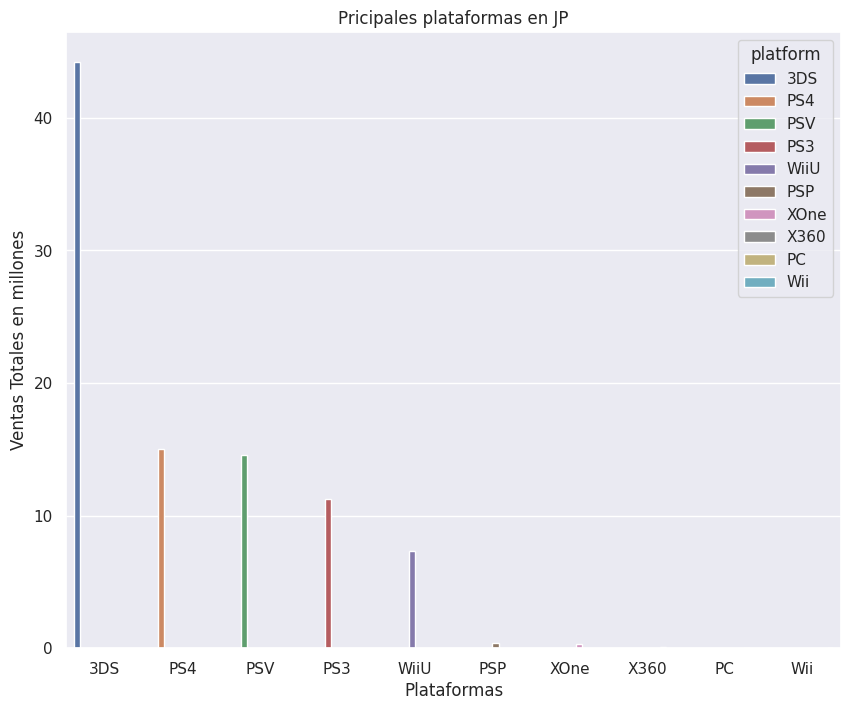

In [72]:
plt.figure(figsize=(10, 8))

sns.barplot(x="platform", y='jp_sales',
             hue="platform",
             data=filtered_jp)
plt.title('Pricipales plataformas en JP')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales en millones')

### Observaciones: 

En el caso de Japon podemos observa comportamientos totalmente diferentes, en este pais prefieren las plataformas 3DS las cuales tienen ventas mayores a 40 millones, luego esta la segunda plataforma preferida en japon la cual es PS4 con aproximadamente 15 millones en ventas, teniendo en cuenta que esta plataforma en las otras regiones es la plataforma con mas popularidad. luego le siguen el PSV con al rededor de 14 millones en venta, la cual tiene una popularidad muy parecida a PS4 en Japon, tambien tenemos PS3 al rededor de 11 millones de ventas y WiiU con al rededor de 8 millones de ventas.

Punto importante aca es recalcar que Japon no es igual de grande que Europa o NorteAmerica, pero aun asi genera muy buenos ingresos.

### Observaciones General:

Pudimos observar en la grafica, que en NA las 5 plataformas populares son (PS4, XOne, X360, 3DS, PS3) Mientras que en EU (PS4, XOne, PS3, PC, 3DS) tenemos casi las mismas plataformas la unica diferencia es que en NA prefieren el X360 y en EU prefieren la PC, tambien podemos observar un orden de preferencias distintas a NA, podemos observar que en NA y EU las dos plataformas preferidas son PS4 y XOne teniendo ingresos muy parecidos, mientras que en tercera posicion en NA es el X360 y en EU es el PS3, de cuarto lugar en NA es el 3DS en EU es la PC y de quinto lugar en NA es el PS3 en EU es el 3DS. 

Por otro lado en JP es muy diferente su plataforma preferida es el 3DS, luego tenemos en segunda posicion el PS4, en tercera el PSV, en cuarto el PS3 y por ultimo el WiiU. podriamos sacar una hipotesis de que a los de Japon les gustan mas son las plataformas portatiles ya que 3 de las 5 del top son portatiles.

In [73]:
df_filtered_2014_2016.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  \
31       Shooter      6.03      5.86      0.36         2.38        14.63   
42        Action      3.96      6.31      0.38         1.97        12.62   
47  Role-Playing      4.35      3.49      3.10         0.74        11.68   
77        Sports      1.12      6.12      0.06         1.28         8.58   
87       Shooter      2.99      3.49      0.22         1.28         7.98   

    critic_score  user_score   rating era_group  
31          73.0         7.4  unknown    recent  
42          97.0         8.3        M    recent  
47          74.0         7.8  unknown    recent  
77          82.0         4.3        E    recent  
87          73.0         7.4  unknown    recent

In [74]:
#Agrupamos nuestros datos por genre y los distintos continentes para verificar que generos son los principales en cada continente.

filtered_genre_region= df_filtered_2014_2016.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
filtered_genre_region

genre  na_sales  eu_sales  jp_sales
8        Shooter     79.02     65.52      4.87
0         Action     72.53     74.68     29.58
10        Sports     46.13     45.73      3.26
7   Role-Playing     33.47     28.17     31.16
3           Misc     15.05     12.86      5.61
2       Fighting     12.43      6.69      6.37
6         Racing      8.74     14.13      1.76
4       Platform      6.79      6.80      2.69
1      Adventure      5.64      6.49      3.60
9     Simulation      2.63      7.30      2.31
11      Strategy      0.98      1.79      0.95
5         Puzzle      0.65      0.52      0.93

In [75]:
#Filtramos nuestro datos con el metodo tolist para poder realizar nuestro grafico

#Tomamos los valores de NA
list_genre_na= filtered_genre_region['genre'].tolist()
list_na= filtered_genre_region['na_sales'].tolist()

#Tomamos los valores de EU
list_genre_eu= filtered_genre_region['genre'].tolist()
list_eu= filtered_genre_region['eu_sales'].tolist()

#Tomamos los valores de JP
list_genre_jp= filtered_genre_region['genre'].tolist()
list_jp= filtered_genre_region['jp_sales'].tolist()

In [76]:
#Creamos nuestro grafico de barras

fig = go.Figure(data=[
    go.Bar(name='NA', x=list_genre_na, y=list_na, marker_color='indianred'),
    go.Bar(name='EU', x=list_genre_eu, y=list_eu, marker_color='lightsalmon'),
    go.Bar(name='JP', x=list_genre_jp, y=list_jp)
])
# Change the bar mode
fig.update_layout(title_text='Generos principales en cada region', xaxis_title= 'Generos', yaxis_title= 'Ingresos totales en millones')
fig.update_layout(barmode='group')
fig.show()

### Observaciones: 

Podemos observar en nuestro grafico que los 5 generos preferidos en NA son (Shooter(79.02m), Action(72.53m), Sports(46.13m), Role-Playing(33.47m) y Misc(15.05m)), en EU son (Action(74.68m), Shooter(65.52m), Sports(45.73m), Role-Playing(28.17m) y Racing(14.13m)) como podemos ver en estas dos regiones son muy parecidas las preferencias de genero, la unica diferencia estaria en el ingreso generado por cada genero en cada region y en que en NA prefieren mas los juegos de Shooter y en EU los juegos de Action.

En el caso de Japon podemos ver que su principal genero es el Role-Playing (31.16m), luego tenemos los de Action (29.58m), estos dos generos son los mas jugados en Japon ya que luego tenemos Fighting(6.37m), Misc(5.61m) y Shooter (4.87m).


In [77]:
#Agrupamos nuestros datos por rating y los distintos continentes para verificar las clasificaciones en distintos paises.
filtered_esrb= df_filtered_2014_2016.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()

#Tomamos los valores de NA
list_rating_na= filtered_esrb['rating'].tolist()
list_na= filtered_esrb['na_sales'].tolist()

#Tomamos los valores de EU
list_rating_eu= filtered_esrb['rating'].tolist()
list_eu= filtered_esrb['eu_sales'].tolist()

#Tomamos los valores de JP
list_rating_jp= filtered_esrb['rating'].tolist()
list_jp= filtered_esrb['jp_sales'].tolist()

In [78]:
#Creamos nuestro grafico de barras

fig = go.Figure(data=[
    go.Bar(name='NA', x=list_rating_na, y=list_na, marker_color='indianred'),
    go.Bar(name='EU', x=list_rating_eu, y=list_eu, marker_color='lightsalmon'),
    go.Bar(name='JP', x=list_rating_jp, y=list_jp)
])
# Change the bar mode
fig.update_layout(title_text='Clasificaciones ESBR en cada region', xaxis_title= 'Clasificaciones', yaxis_title= 'Ingresos por region en millones')
fig.update_layout(barmode='group')
fig.show()

### Observaciones:

Podemos verificar en nuestro grafico que la clasificacion con mayores ventas en NA y EU es la M con NA(96.42m) y EU(93.44m) luego podemos observar una gran cantidad de datos desconocidos, los cuales representan una gran cantidad de ingresos de entre 56 a 65 millones en ventas pero no podemos saber con exactitud a que categoria pertenecen. tendriamos que ponermos a buscar cada categoria de cada juego y asignarla o en su dado caso notificar al departamento encargado para verificar y corregir estos datos.

Por otro lado tenemos la clasificacion E igualmente con grandes ingresos en NA y EU las cuales son EU(58.06m) y NA(50.74m), Luego Tenemos la Clasificacion T con NA(38.95m) y EU(34.07m). Por ultimo tenemos la clasificacion E10+ la cual nuevamente tiene mayores ventas en NA(33.23m) y EU(26.16m)

Ahora visualicemos las clasificaciones en Japon la que genera mayores ventas es la clasificacion T (14.78m) le sigue la E (8.94m) luego M (8.01m) y por ultimo E10+ (4.46m).

En conclusion podemos ver que en las regiones NA y EU las datos se comportan muy similar con excepcion nuevamente en Japon que desde el principio a tenido comportamientos muy diferentes.
Nuevamente debemos tener en cuanta de que existe una gran cantidad de datos desconocidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

# Prueba de las hipótesis

Nuestro estudio de hipotesis se realizara a la muestra de los años entre 2014 y 2016

In [79]:
#Filtramos el promedio de calificaciones para cada plataforma 

xone_scores = df_filtered_2014_2016[df_filtered_2014_2016['platform']== 'XOne']
pc_scores = df_filtered_2014_2016[df_filtered_2014_2016['platform']== 'PC']

In [85]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre los dos grupos

alpha= 0.05

platform_levene_results = st.levene(xone_scores['user_score'], pc_scores['user_score'])

print('El valor p en el test de levene es:', platform_levene_results.pvalue)

if platform_levene_results.pvalue < alpha:
    print('Rechazamos la hipotesis nula: las poblaciones tienen una varianza diferente')
else:
    print('No rechazamos la hipotesis nula: las poblaciones tienen varianzas iguales ')

El valor p en el test de levene es: 0.003998859874636311
Rechazamos la hipotesis nula: las poblaciones tienen una varianza diferente


### Observaciones:

De acuerdo al resultado del test de levene se rechaza la hipótesis nula, por lo que las varianzas no son iguales. Entonces el parámetro equal_var se coloca en False.

In [84]:
# Se prueba las hipótesis
# valor de alfa
alpha= 0.05
# se asigna el resultado en 'results_score'
results_score = st.ttest_ind(xone_scores['user_score'], pc_scores['user_score'], equal_var= False)

print('El valor p es:', results_score.pvalue)

if results_score.pvalue < alpha:
    print('Se rechaza la hipótesis nula: ')
else:
    print('No se rechaza la hipótesis nula')

El valor p es: 0.05074473945849195
No se rechaza la hipótesis nula


### Observaciones:

De acuerdo al resultado, no podemos rechazar la hipótesis nula de que las calificaciones de los usuarios para las plataformas Xbox One y PC son iguales. El resultado indica que las calificaciones de los usuarios no difiere para cada plataforma XOne o PC

In [87]:
#Filtramos las calificaciones para cada Genero 

action_scores = df_filtered_2014_2016[df_filtered_2014_2016['genre']== 'Action']
sport_scores = df_filtered_2014_2016[df_filtered_2014_2016['genre']== 'Sports']

In [88]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre los dos grupos

alpha= 0.05

genre_levene_results = st.levene(action_scores['user_score'], sport_scores['user_score'])

print('El valor p en el test de levene es:', genre_levene_results.pvalue)

if genre_levene_results.pvalue < alpha:
    print('Rechazamos la hipotesis nula: las poblaciones tienen una varianza diferente')
else:
    print('No rechazamos la hipotesis nula: las poblaciones tienen varianzas iguales ')

El valor p en el test de levene es: 1.0603216689025389e-29
Rechazamos la hipotesis nula: las poblaciones tienen una varianza diferente


### Observaciones:

De acuerdo al resultado del test de levene se rechaza la hipótesis nula, por lo que las varianzas no son iguales. Entonces el parámetro equal_var se coloca en False.

In [89]:
# Se prueba las hipótesis
# valor de alfa
alpha= 0.05
# se asigna el resultado en 'results_score'
results_genre = st.ttest_ind(action_scores['user_score'], sport_scores['user_score'], equal_var= False)

print('El valor p es:', results_genre.pvalue)

if results_genre.pvalue < alpha:
    print('Se rechaza la hipótesis nula:')
else:
    print('No se rechaza la hipótesis nula')

El valor p es: 7.412639945317511e-17
Se rechaza la hipótesis nula:


### Observaciones:

De acuerdo al resultado, podemos rechazar la hipótesis nula de que las calificaciones de los usuarios para los géneros de Acción y Deportes sean diferentes. El valor de p nos dice que existe una gran probabilidad de que existe una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes. Los usuarios claramente tienen preferencias distintas entre los juegos de Acción y Deportes.

### Observaciones:

La prueba de la hipotesis nos confirma que efectivamente las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes lo que nos indica que es cierta esta hipotesis.

Esta hipotesis la formule filtrando el Dataframe por 'genre' y por 'user_score' y colocando como parametro equal_var= el cual es un parámetro opcional que especifica si las varianzas de las poblaciones deben considerarse iguales o no. Se pasa como equal_var = True o equal_var = False (True significa que consideramos las varianzas iguales, False significa que no).

# Conclusiones Generales

### Juegos lanzados en diferentes años:

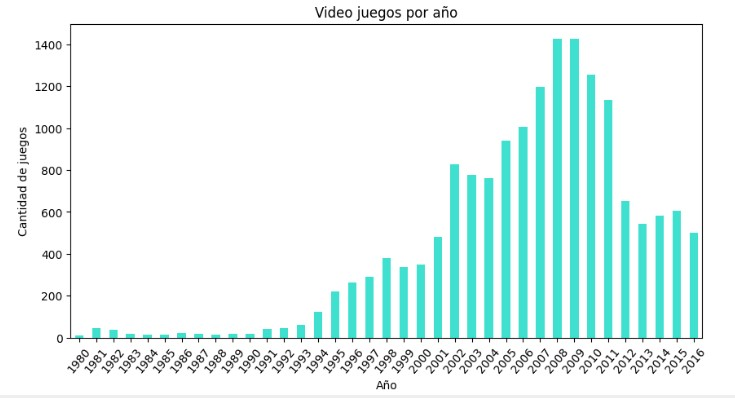

Podemos visualizar que los mejores 5 años en ventas de videojuegos son desde el 2007 al 2011.

### Ventas totales por plataforma:

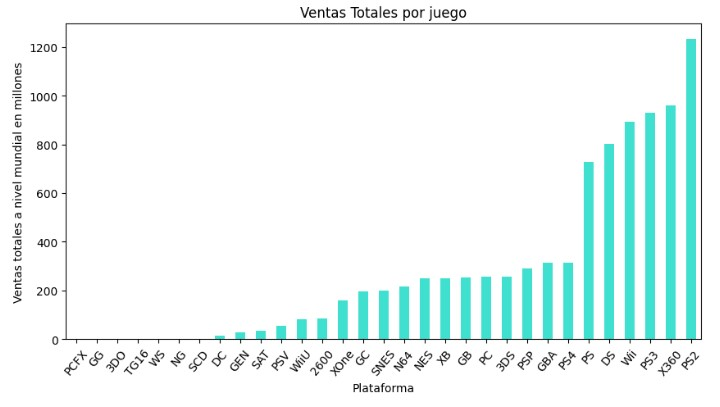

Como podemos visualizar en las ventas totales, el PS2 lidera como la consola con mas ventas hasta el momento teniendo en cuenta que esta consola tiene en el mercado desde el año 2000, mientras que las otras plataformas fueron lanzadas desde el 2005 en adelante.

### Ventas totales por año/plataforma:

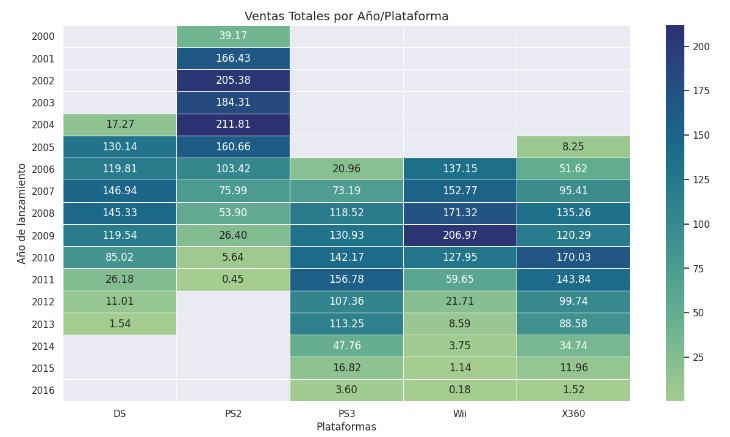

podemos visualizar en nuestro Headmap, que ya la mayorias de estas 5 plataformas para la fecha actual si nos fijamos bien 2 de ellas (DS, PS2) ya no estan generando ganancias y las otras 3 (PS3, Wii, X360) si estan generando aun un poco de ingresos pero ya estan por desaparecer lo podemos evidenciar con los pocos ingresos generados en los ultimos años en los cuales los ingresos han ido decayendo, vamos a estudiar el porque de esto.

### Lanzamientos y ventas de plataformas por año:

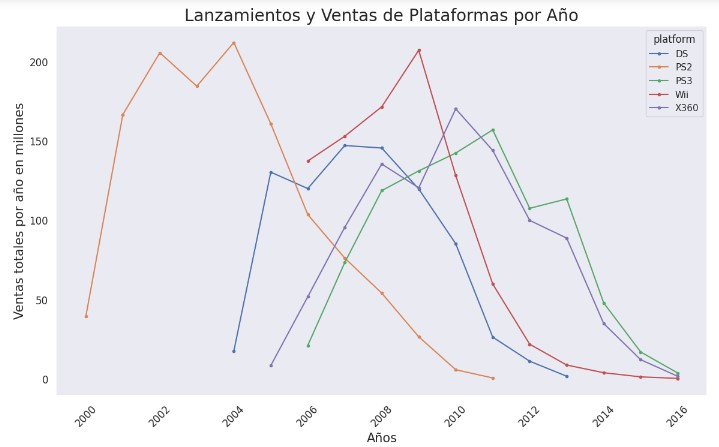

La plataforma/consola con mayores ventas es PS2 desde el 2000 hasta el 2004. En el 2004 son lanzadas al mercado otras plataformas, por lo que la competencia crece y con ello las ventas de PS2 comienzan a disminuir.

Luego podemos observar que la proxima plataforma/consola con mayores ventas es el Wii luego de 3 años de haberse lanzado al mercado (2006) en el 2009 podemos ver un gran aumentos en las ventas, luego de ese año las ventas empezaron a caer, tomando luego el primer lugar el X360 en el año 2010 luego de ese año las ventas tambien empiezan a caer para X360, tomando ahora el primer lugar el PS3 en el año 2011.

Podemos observar en el grafico que las ventas de todas las desde el año 2011 fueron decayendo hasta el año 2016 donde se puede evidenciar que en wii se mantiene como la 3era consola mas vendida, el X360 en la segunda posicion y el PS3 en la primera posicion. teniendo encuenta que la diferencia de ventas no es muy grande estan las 3 muy cerca entre si.

## Tiempo de vida de las plataformas

### Ventas totales de las plataformas retro:

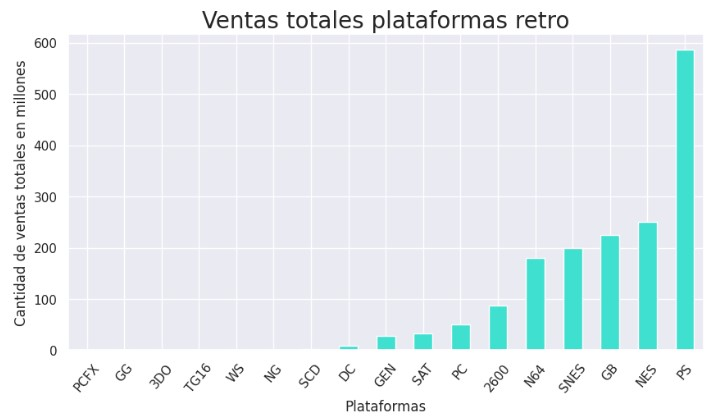

Las 10 plataformas retro (con lanzamiento menores al año 2000) con más ventas globales entre 1980 y 2000 fueron DC, GEN, SAT, PC, 2600, N64, SNES, GB, NES y PS.

### Ventas globales de las plataformas populares retro en la época reciente:

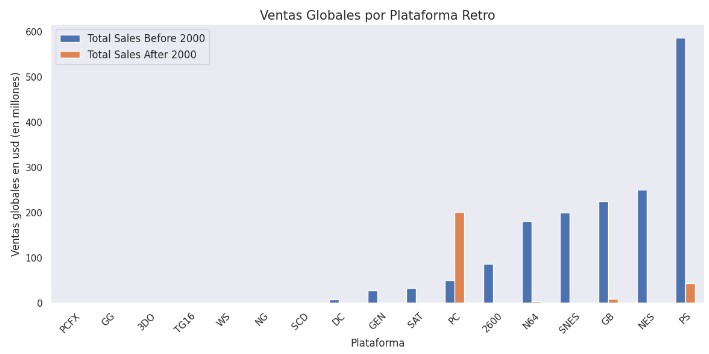

En nuestra visualizacion podemos evidenciar que de las 10 plataformas existentes antes de los 2000, solo 3 llegaron a generar ingresos notables despues de los 200 las cuales son (GB, PS y PC) siendo PC la plataforma con mayores ventas entre el grupo de 3 mencionado anteriormente.

Es impresionante como PC en la unica plataforma que logro sobrevivir a nuevas plataformas luego de los años 2000 teniendo en cuenta que esta plataforma en sus tiempo se encontraba en el top 7 de popularidad. siendo PS la mas popular para la epoca la cual en la actualidad fue superada por PC.

### Tiempo de vida de las plataformas:

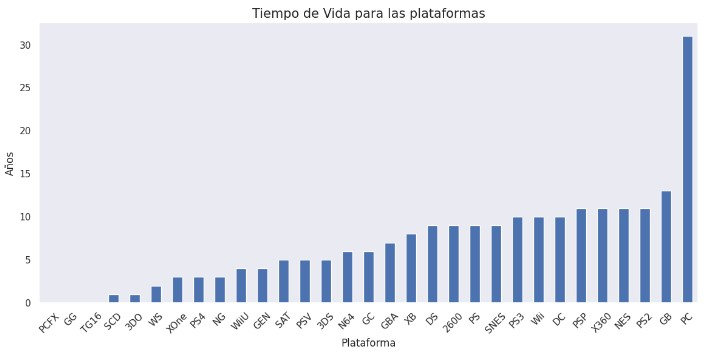

Con los nuevos datos analizados podemos evidenciar que de todas las plataformas retro, PC es la unica que se mantiene con vida en el mercado con 31 años desde que fue lanzada.

- El tiempo de vida promedio para las plataformas Retro es:
    casi 7 años
    
- El tiempo de vida promedio para las plataformas Recientes es:
    al rededor de 7 años
    
- El tiempo promedio en que tardo cada plataforma en aparecer es:
    al rededor de 1 año
    
Las 5 plataformas con más ventas globales son DS, PS2, PS3, X360 y Wii. Del año 2000 hasta 2004 la consola PS2 tenía mayores ventas, pero a partir del 2004 aparecen otras plataformas de nueva generción. Lo que conlleva a que las ventas del PS2 diminuyan y las de las nuevas plataformas aumenten. El Nintendo Wii tuvo la mayor cantidad de ventas globales a partir de su lanzamiento en 2006 hasta el 2009. A partir del 2010 las cosolas que lideran las ventas globales son X360 y PS3.

Las 10 platformas retro (lanzadas antes del 2000) que solían ser populares eran DC, GEN, SAT, PC, 2600, N64, SNES, GB, NES y PS. Sim embargo, a partir del año 2000 sus ventas desaparecen en algunas plataformas y en otras se pueden apreciar ventas pero muy bajas la unica que siguio en aumento fue PC de manera considerable, por lo que ya no lideran las ventas globales, lo cuál se debe al lanzamiento de consolas de nueva generación. Es importante recalcar que la única plataforma que se ha mantenido vigente y que aumentaron sus ventas fue para PC, sus ventas aumentaron aproximadamente en 401.80 %.

En promedio las plataformas retro su tiempo de vida es 6.71 años, Mientras que, para plataformas lanzadas a partir del 2000 su tiempo de vida promedio es 7.36 años.

El tiempo promedio que tardo en lanzarse una plataforma nueva al mercado es de 1.07 años.

## Plataformas líderes en ventas

Dado que el tiempo de vida de las plataformas esta entre 6 y 7años y que sólo una plataforma retro se mantienen vigente, o bien, con ventas después del 2000, 'PC'. Además, las plataformas con más ventas globales después del 2010 son PS3 y X360, asimismo, la consola PS4 es de nueva generación por tanto lo más probable es que desplace al PS3. Con base a lo anterior, sólo se tomarán en cuenta los datos a partir del año 2014, para tomar en cuenta solo plataformas con ventas relevantes y de nueva generación.

### Ventas totales de las plataformas recientes:

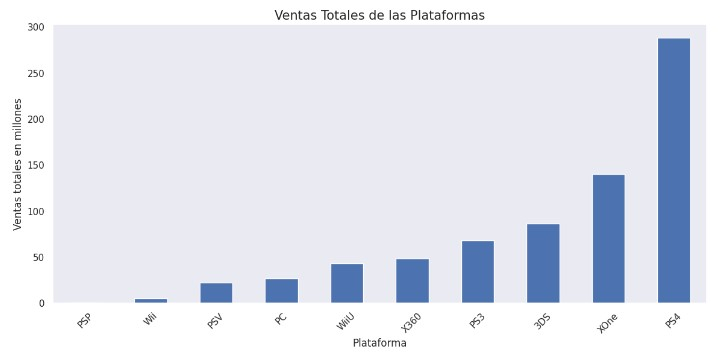

Como podemos ver en nuestro grafico, se puede verificar que cada vez que salen plataformas nuevas las anteriores se van desplazando y van perdiendo ventas al pasar los años hasta que desaparecen por completo.

Tambien podemos observar que la plataforma PSP para estas fechas selecionadas, estaba ya casi desapareciendo, PSP termina de generar registros de ventas en el año 2015.

### Distribucion de ventas totales por plataformas:

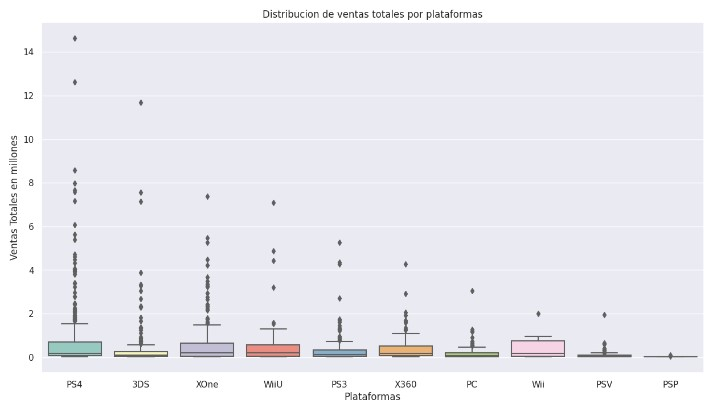

Podemos observar en nuestro diagrama de caja que los datos se encuentran sesgados de forma positiva hacia la derecha, lo que nos indica que la media es mayor que la mediana.

tambien podemos observar que el promedio de ventas entre las plataformas en muy parecido la mediana es igual o muy parecidas entre si, se mantiene alrededor de menos de 1 millon en ventas, por otro lado el promedio maximo de ventas se situa por debajo de los 2 millones en ventas, las plataformas PS4, XOne, WiiU, X360 y Wii, son las plataformas con promedios de ventas importantes.

Dos de estas 5 plataformas tienen una gran cantidad de valores atipicos (PS4 y XOne), lo que nos indica que estas dos plataformas son las que tienen mayores ventas totales, muy por encima a su promedio. En otras palabras, estas plataformas tienen ventas excepcionales que superan por mucho el rendimiento promedio de las demás plataformas.

## Graficos de dispersión para calcular la correlación entre las reseñas y las ventas

### Correlacion entre las reseñas y ventas de PS4:

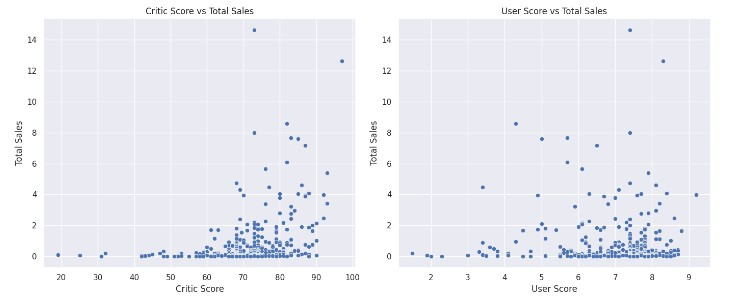

Correlación entre puntaje crítico y ventas totales (0,35):
Existe una relación positiva moderada. Esto significa que, en general, a medida que el puntaje crítico aumenta, las ventas totales también tienden a aumentar. Sin embargo, la correlación no es perfecta, lo que indica que otros factores también podrían influir en las ventas.

Correlación entre la puntuación del usuario y las ventas totales (-0,07):
Existe una relación negativa muy débil. Esto significa que, en general, a medida que la puntuación del usuario aumenta, las ventas totales tienden a disminuir un poco. Sin embargo, la correlación es tan débil que no podemos estar seguros de que exista una relación real entre estas dos variables.

## Ventas de los mismos juegos de PS4 en otras plataformas

### Correlacion entre las reseñas y ventas de XOne:

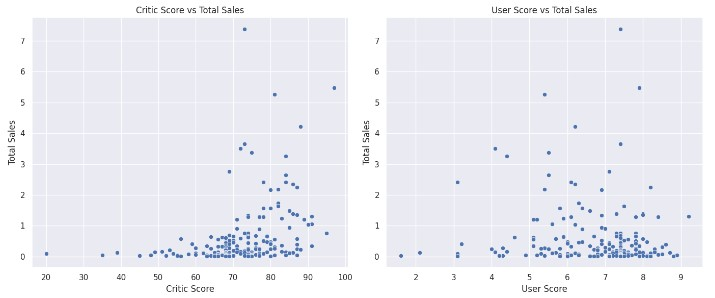

Correlación entre puntaje crítico y ventas totales (0,35):
Podemos observar que la comparacion de los mismos juegos de PS4 en la plataforma XOne, su correlacion entre critic_score y total_sales es igual a la plaforma PS4 (0.35) lo que quiere decir que Existe una relación positiva moderada. Esto significa que, en general, a medida que el puntaje crítico aumenta, las ventas totales también tienden a aumentar.

Correlación entre la puntuación del usuario y las ventas totales (-0,11):
Existe una relación negativa muy débil en este caso es un poco mas baja que la anterior pero podemos confirmas que los usuarios de ambas plataformas actuan de forma muy parecida. Esto significa que, en general, a medida que la puntuación del usuario aumenta, las ventas totales tienden a disminuir un poco.

### Correlacion entre las reseñas y ventas de PC:

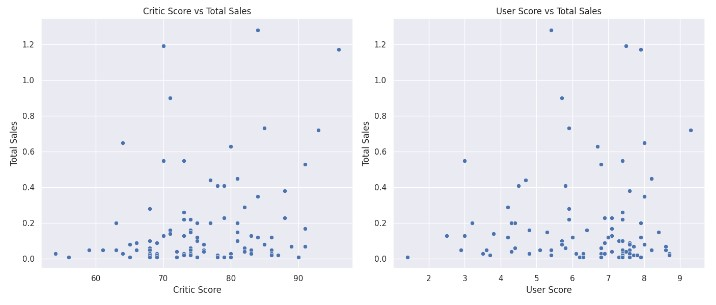

Correlación entre puntaje crítico y ventas totales (0,25):
Podemos observar que la comparacion de los mismos juegos de PS4 en la plataforma PC, su correlacion entre critic_score y total_sales es muy parecida a las plaformas PS4 y XOne (0.35) lo que quiere decir que Existe una relación positiva moderada. Esto significa que, en general, a medida que el puntaje crítico aumenta, las ventas totales también tienden a aumentar.

Correlación entre la puntuación del usuario y las ventas totales (-0,04):
Existe una relación negativa muy débil en este caso es un poco mas baja que las anterior pero podemos confirmar que los usuarios de ambas plataformas actuan de forma muy parecida. Esto significa que, en general, a medida que la puntuación del usuario aumenta, las ventas totales tienden a disminuir un poco.

## Distribución general de los juegos por género

### Ventas totales por genero:

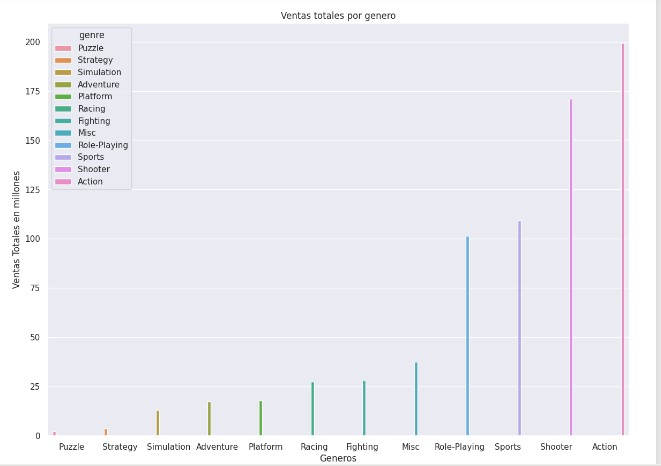

Podemos observar en nuestra grafica que los generos con mayores ventas son (Role-Playing, Sports, Shooter, Action) estos juegos estan alrededor de los 100 a 200 millones en ventas, y los generos con ventas menores son. (Puzzle, Strateggy, Simulation, Adventure, Platform, Racing, Fighting, Msc) estos juegos estan por debajo de los 40 millones en ventas.

## Perfil de usuario para cada región

### Principales plataformas en NorteAnmerica:

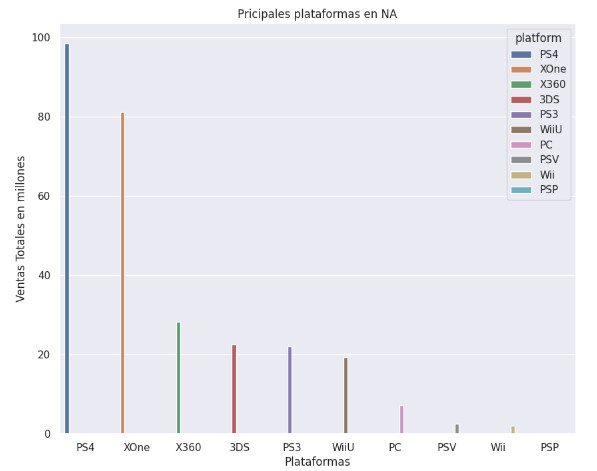

Podemos confirmar las 5 plataformas preferidas en Norteamérica, siendo PS4 la más popular con casi 100 millones en ventas. La plataforma XOne es la segunda más popular, muy cercana a PS4, con un poco más de 80 millones en ventas. Por otro lado, tenemos las plataformas X360, 3DS, PS3 y , con ventas que oscilan entre los 19 y los 30 millones. Cabe destacar que, de las 5 plataformas, PS4 y XOne son las preferidas en Norteamérica.

### Principales plataformas en Europa:

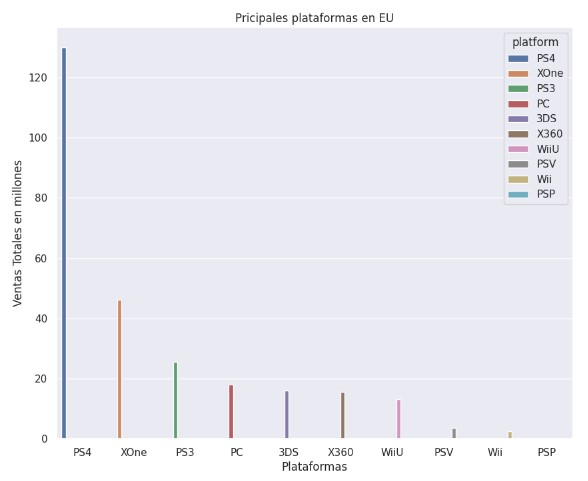

Podemos confirmar las 5 plataformas preferidas en Europa, siendo PS4 la más popular con mas de 120 millones en ventas. La plataforma XOne es la segunda más popular, en este caso no tan cercana a PS4, con un poco más de 40 millones en ventas. Por otro lado, tenemos las plataformas PS3, PC,3DS, con ventas que oscilan entre los 17 y los 30 millones. Cabe destacar que, de las 5 plataformas, PS4 y XOne siguen siendo las preferidas en Europa.

### Principales plataformas en Japon:

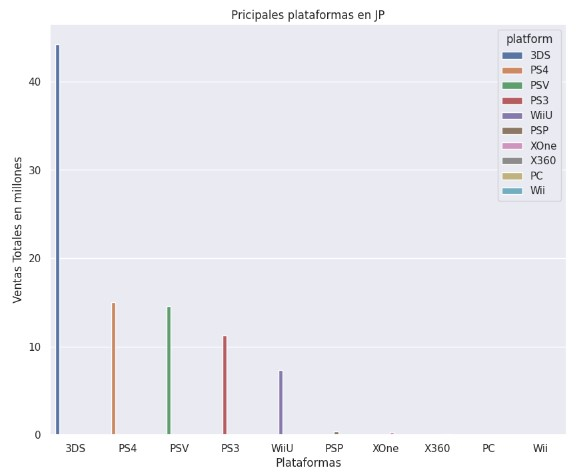

En el caso de Japon podemos observa comportamientos totalmente diferentes, en este pais prefieren las plataformas 3DS las cuales tienen ventas mayores a 40 millones, luego esta la segunda plataforma preferida en japon la cual es PS4 con aproximadamente 15 millones en ventas, teniendo en cuenta que esta plataforma en las otras regiones es la plataforma con mas popularidad. luego le siguen el PSV con al rededor de 14 millones en venta, la cual tiene una popularidad muy parecida a PS4 en Japon, tambien tenemos PS3 al rededor de 11 millones de ventas y WiiU con al rededor de 8 millones de ventas.

Punto importante aca es recalcar que Japon no es igual de grande que Europa o NorteAmerica, pero aun asi genera muy buenos ingresos.

#### Observaciones General:
Pudimos observar en la grafica, que en NA las 5 plataformas populares son (PS4, XOne, X360, 3DS, PS3) Mientras que en EU (PS4, XOne, PS3, PC, 3DS) tenemos casi las mismas plataformas la unica diferencia es que en NA prefieren el X360 y en EU prefieren la PC, tambien podemos observar un orden de preferencias distintas a NA, podemos observar que en NA y EU las dos plataformas preferidas son PS4 y XOne teniendo ingresos muy parecidos, mientras que en tercera posicion en NA es el X360 y en EU es el PS3, de cuarto lugar en NA es el 3DS en EU es la PC y de quinto lugar en NA es el PS3 en EU es el 3DS.

Por otro lado en JP es muy diferente su plataforma preferida es el 3DS, luego tenemos en segunda posicion el PS4, en tercera el PSV, en cuarto el PS3 y por ultimo el WiiU. podriamos sacar una hipotesis de que a los de Japon les gustan mas son las plataformas portatiles ya que 3 de las 5 del top son portatiles.

### Generos principales en cada region:

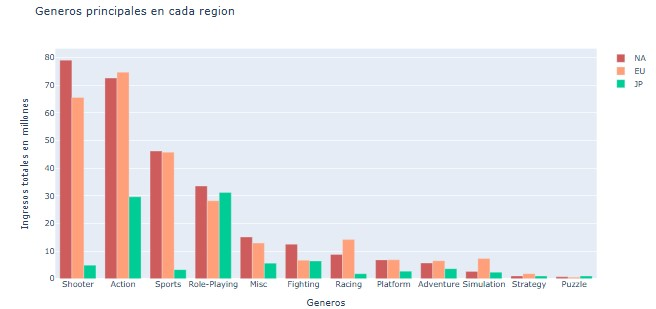

Podemos observar en nuestro grafico que los 5 generos preferidos en NA son (Shooter(79.02m), Action(72.53m), Sports(46.13m), Role-Playing(33.47m) y Misc(15.05m)), en EU son (Action(74.68m), Shooter(65.52m), Sports(45.73m), Role-Playing(28.17m) y Racing(14.13m)) como podemos ver en estas dos regiones son muy parecidas las preferencias de genero, la unica diferencia estaria en el ingreso generado por cada genero en cada region y en que en NA prefieren mas los juegos de Shooter y en EU los juegos de Action.

En el caso de Japon podemos ver que su principal genero es el Role-Playing (31.16m), luego tenemos los de Action (29.58m), estos dos generos son los mas jugados en Japon ya que luego tenemos Fighting(6.37m), Misc(5.61m) y Shooter (4.87m).


### Ingresos de cada ESRB por region:

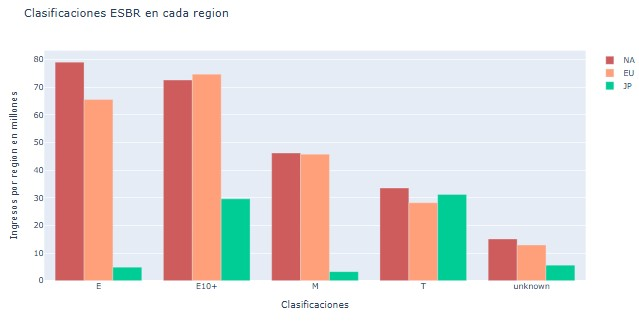

Podemos verificar en nuestro grafico que la clasificacion con mayores ventas en NA y EU es la M con NA(96.42m) y EU(93.44m) luego podemos observar una gran cantidad de datos desconocidos, los cuales representan una gran cantidad de ingresos de entre 56 a 65 millones en ventas pero no podemos saber con exactitud a que categoria pertenecen. tendriamos que ponermos a buscar cada categoria de cada juego y asignarla o en su dado caso notificar al departamento encargado para verificar y corregir estos datos.

Por otro lado tenemos la clasificacion E igualmente con grandes ingresos en NA y EU las cuales son EU(58.06m) y NA(50.74m), Luego Tenemos la Clasificacion T con NA(38.95m) y EU(34.07m). Por ultimo tenemos la clasificacion E10+ la cual nuevamente tiene mayores ventas en NA(33.23m) y EU(26.16m)

Ahora visualicemos las clasificaciones en Japon la que genera mayores ventas es la clasificacion T (14.78m) le sigue la E (8.94m) luego M (8.01m) y por ultimo E10+ (4.46m).

En conclusion podemos ver que en las regiones NA y EU las datos se comportan muy similar con excepcion nuevamente en Japon que desde el principio a tenido comportamientos muy diferentes. Nuevamente debemos tener en cuanta de que existe una gran cantidad de datos desconocidos.

## Prueba de las hipotesis

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

La prueba de hipotesis de las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales por ende no es cierta esta hipotesis.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

La prueba de la hipotesis nos confirma que efectivamente las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes lo que nos indica que es cierta esta hipotesis.


# Recomendaciones

Basado en los datos analisados podemos dar las siguientes recomendaciones y observaciones a tener en cuenta para obtener buenos resultados en el año 2017.



- Cada plataforma tiene un tiempo de vida al rededor de 6 a 7 años de vida.



- Cada vez que salen plataformas modernas las anteriores empiezan a ser desplazadas.



- EL tiempo promedio que se ha lanzado una nueva plataforma al mercado es aproximadamente con 1 año de diferencia.



- La unica plataforma retro que aun se encuentra en la actualidad es PC siendo unas de las plataformas preferidas por los Europeos.



- En general, a medida que el puntaje crítico aumenta, las ventas totales también tienden a aumentar y a medida que la puntuación del usuario aumenta, las ventas totales tienden a disminuir un poco. Este comportamiento lo evidenciamos en varias de las plataformas las cuales se comportan de manera muy similar.



- Los principales generos a tener en cuenta a nivel mundial para obtener mayores ingresos ya que son los preferidos son Role-Playing, Sports, Shooter, Action.



- las 5 plataformas preferidas en NorteAmerica son: PS4, XOne, X360, 3DS y PS3 en esta plataformas es en las que debemos enfocarnos a la hora de realizar alguna estrategia de venta.



- Las 5 plataformas preferidas en Europa son: PS4, XOne, PS3, PC y 3DS. en esta plataformas es en las que debemos enfocarnos a la hora de realizar alguna estrategia de venta.



- Las 5 plataformas preferidas en Japon son: 3DS, PS4, PSV, PS3 y WiiU, en esta region podemos observar que 3 de 5 plataformas son portatiles por lo que podemos deducir que los Japoneses prefieren las plataformas portatiles. en esta plataformas es en las que debemos enfocarnos a la hora de realizar alguna estrategia de venta.



- A la hora de tomar alguna decision de estrategias de ventas ya sabemos que generos prefieren los NorteAmericanos los cuales son: (Shooter(79.02m), Action(72.53m), Sports(46.13m), Role-Playing(33.47m) y Misc(15.05m))



- A la hora de tomar alguna decision de estrategias de ventas en base a los generos ya sabemos que en Europa prefieron los siguientes generos: (Action(74.68m), Shooter(65.52m), Sports(45.73m), Role-Playing(28.17m) y Racing(14.13m))



- A la hora de tomar alguna decision de estrategias de ventas en base a los generos preferidos de los Japoneses sabemos que son los siguientes: Role-Playing (31.16m), Action (29.58m), Fighting(6.37m), Misc(5.61m) y Shooter (4.87m).



- Tambien podemos tener en cuenta para futuros lanzamientos de Videojuegos cuales son las regiones con mayores ventas dependiendo de su ESRB: los juegos con clasificacion M son las mas vendidas en Norteamerica y Europa, la segunda clasificacion preferida por los NA y EU son las E de Tercer lugar en las mismas regiones tenemos las T por ultimo las E10+. Teniendo esto presente podemos tener en cuenta cuanto podria generar en ingresos un juego lanzado dependiendo de su clasificacion y tener una idea de quienes son nuestros potenciales clientes en dichas regiones es este caso sabemos que son personas +17 o asi deberia ser.

    En el caso de Japon es Diferente los Japones prefieren en primer instacia los juegos de clasificacion T, le siguen la clasificacion E, M y E10+. Teniendo esto presente podemos tener en cuenta cuanto podria generar en ingresos un juego lanzado dependiendo de su clasificacion y tener una idea de quienes son nuestros potenciales clientes en japon en este caso sabemos que son personas +13 o asi deberia ser.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de la conclusión y de las recomendaciones. Resumen todos los resultados del proyecto
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:



*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>